In [1]:
import seesaw

In [2]:
from seesaw import BenchParams, SessionParams, GlobalDataManager, BenchRunner, CacheStub

In [3]:
import os
import importlib
import numpy as np
from tqdm.auto import tqdm
#from plotnine import *
os.environ['OMP_NUM_THREADS'] = f'{4}'

In [5]:
import ray

In [6]:
from seesaw import make_bench_actors, parallel_run

In [7]:
import importlib

In [8]:
ray.init('auto', namespace='seesaw', log_to_driver=False, ignore_reinit_error=True)

2022-01-24 11:02:24,976	INFO worker.py:842 -- Connecting to existing Ray cluster at address: 172.31.130.197:6379


{'node_ip_address': '172.31.130.197',
 'raylet_ip_address': '172.31.130.197',
 'redis_address': '172.31.130.197:6379',
 'object_store_address': '/state/partition1/user/omoll/raytmp/session_2022-01-24_11-01-19_919626_38163/sockets/plasma_store',
 'raylet_socket_name': '/state/partition1/user/omoll/raytmp/session_2022-01-24_11-01-19_919626_38163/sockets/raylet',
 'webui_url': '127.0.0.1:8265',
 'session_dir': '/state/partition1/user/omoll/raytmp/session_2022-01-24_11-01-19_919626_38163',
 'metrics_export_port': 55099,
 'node_id': '33d9ccd1e6807a2e53959710d8a1b9ac8157077dde72080bbee66f24'}

In [9]:
import numpy as np

In [10]:
gdm = GlobalDataManager('/home/gridsan/omoll/seesaw_root/')
os.chdir(gdm.root)
#ds_names = ['data/objectnet']

In [11]:
import pandas as pd
import pyroaring as pr

In [12]:
import copy

In [13]:
import seesaw.dataset_search_terms

In [14]:
from seesaw import BenchResult, BenchSummary

In [15]:
from pydantic import BaseModel
from typing import Optional

In [16]:
s0 = dict(warm_start='warm', model_type='cosine',
                  batch_size=3, minibatch_size=10,learning_rate=.005,
                  num_epochs=2,loss_margin=.1,max_examples=500)
b0 = dict(n_batches=10,max_feedback=None,box_drop_prob=0., max_results=100)

In [17]:
variants = [
    dict(name='seesaw', interactive='pytorch', index_name='multiscale'),
    dict(name='multi', interactive='plain', index_name='multiscale'),
    dict(name='baseline', interactive='plain', index_name='coarse'),
]

datasets = ['data/lvis/', 'data/bdd/', 'data/coco/', 'data/dota/', 'data/objectnet/']

In [18]:
import math

In [28]:
from seesaw import IndexSpec
importlib.reload(seesaw)
from seesaw.seesaw_bench import *

In [39]:
cfgs = gen_configs(gdm, datasets=datasets, variants=variants, s_template=s0, b_template=b0, max_classes_per_dataset=2000)

In [26]:
import random
import string

In [40]:
key = ''.join([random.choice(string.ascii_letters) for _ in range(10)])
results_dir = f'/home/gridsan/omoll/bench_results/bench_{key}/'
os.makedirs(results_dir, exist_ok=True)
print(results_dir)
#br = BenchRunner(seesaw_root=gdm.root, results_dir=results_dir)

/home/gridsan/omoll/bench_results/bench_kzCgNyGRQD/


In [35]:
actors = make_bench_actors(resources_per_bench=dict(num_cpus=16, memory=12*(2**30)), 
                           bench_constructor_args=dict(seesaw_root=gdm.root, results_dir=results_dir))

creating 33 based on available shares: mem 11 cpu 5


In [36]:
_ = ray.get([a.ready.remote()  for a in actors])

In [37]:
# for a in actors:
#     ray.kill(a)

In [41]:
parallel_run(actors=actors, tups=cfgs)

  0%|          | 0/4920 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [135]:
for cfg in cfgs:
    br.run_loop(*cfg)

saving output to /home/gridsan/omoll/bench_results/test1_jPMKcdFuHS//session_20220123-215213_balkhadgfl
cacheing first /home/gridsan/omoll/seesaw_root /state/partition1/slurm_tmp/12762051.0.0/seesaw_data_cache/ ./data/lvis/indices/multiscale//vectors.annoy
path already copied, returning fast
done loading
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
saving output to /home/gridsan/omoll/bench_results/test1_jPMKcdFuHS//session_20220123-215220_nifdvmcyev
cacheing first /home/gridsan/omoll/seesaw_root /state/partition1/slurm_tmp/12762051.0.0/seesaw_data_cache/ ./data/lvis/indices/multiscale//vectors.annoy
path already copied, returning fast
done loading
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
saving output to /home/gridsan/omoll/bench_results/test1_jPMKcdFuHS//session_20220123-215224_gcgcudarra
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
saving output to /home/gridsan/omoll/bench_results/test1_jPMKcdFuHS//sessi

Metadata Fetch Progress: 100%|██████████| 5/5 [00:00<00:00, 409.86it/s]


saving reference to /home/gridsan/omoll/seesaw_root/./data/coco/indices/multiscale//vectors.sorted.cached
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
saving output to /home/gridsan/omoll/bench_results/test1_jPMKcdFuHS//session_20220123-215409_acbfopmjof
cacheing first /home/gridsan/omoll/seesaw_root /state/partition1/slurm_tmp/12762051.0.0/seesaw_data_cache/ ./data/coco/indices/multiscale//vectors.annoy
path already copied, returning fast
done loading
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
saving output to /home/gridsan/omoll/bench_results/test1_jPMKcdFuHS//session_20220123-215423_jlknnavthd
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
saving output to /home/gridsan/omoll/bench_results/test1_jPMKcdFuHS//session_20220123-215427_znsdipxhiv
cacheing first /home/gridsan/omoll/seesaw_root /state/partition1/slurm_tmp/12762051.0.0/seesaw_data_cache/ ./data/coco/indices/multiscale//vectors.annoy
path already copi

Metadata Fetch Progress: 100%|██████████| 5/5 [00:00<00:00, 81.12it/s]


saving reference to /home/gridsan/omoll/seesaw_root/./data/dota/indices/multiscale//vectors.sorted.cached
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
saving output to /home/gridsan/omoll/bench_results/test1_jPMKcdFuHS//session_20220123-215534_lndpcppvmn
cacheing first /home/gridsan/omoll/seesaw_root /state/partition1/slurm_tmp/12762051.0.0/seesaw_data_cache/ ./data/dota/indices/multiscale//vectors.annoy
path already copied, returning fast
done loading
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
saving output to /home/gridsan/omoll/bench_results/test1_jPMKcdFuHS//session_20220123-215537_hscyotfttx
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
saving output to /home/gridsan/omoll/bench_results/test1_jPMKcdFuHS//session_20220123-215537_zfvzygcaal
cacheing first /home/gridsan/omoll/seesaw_root /state/partition1/slurm_tmp/12762051.0.0/seesaw_data_cache/ ./data/dota/indices/multiscale//vectors.annoy
path already copi

Metadata Fetch Progress: 100%|██████████| 5/5 [00:00<00:00, 442.61it/s]


saving reference to /home/gridsan/omoll/seesaw_root/./data/objectnet/indices/multiscale//vectors.sorted.cached
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
saving output to /home/gridsan/omoll/bench_results/test1_jPMKcdFuHS//session_20220123-215600_ntjtikimnr
cacheing first /home/gridsan/omoll/seesaw_root /state/partition1/slurm_tmp/12762051.0.0/seesaw_data_cache/ ./data/objectnet/indices/multiscale//vectors.annoy
path already copied, returning fast
done loading
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
saving output to /home/gridsan/omoll/bench_results/test1_jPMKcdFuHS//session_20220123-215601_loobnbrosz
iter 0
iter 1
iter 2
iter 3
iter 4
iter 5
iter 6
iter 7
iter 8
iter 9
saving output to /home/gridsan/omoll/bench_results/test1_jPMKcdFuHS//session_20220123-215603_czvcxyexme
cacheing first /home/gridsan/omoll/seesaw_root /state/partition1/slurm_tmp/12762051.0.0/seesaw_data_cache/ ./data/objectnet/indices/multiscale//vectors.annoy
pa

In [1]:
import ray

In [14]:
oref = ray.put('hi')
class W:
    def __init__(self, ref):
        self.ref = ref
    def __repr__(self):
        return f'W({str(self.ref)})'

In [15]:
W(oref)

W(ObjectRef(ffffffffffffffffffffffffffffffffffffffff0100000005000000))

In [7]:
@ray.remote
def fun(r):
    print(r)

In [16]:
fun.remote(W(oref))

ObjectRef(63964fa4841d4a2effffffffffffffffffffffff0100000001000000)

(fun pid=40912) W(ObjectRef(ffffffffffffffffffffffffffffffffffffffff0100000005000000))


2022-01-24 13:21:20,351	ERROR worker.py:478 -- print_logs: Connection closed by server.
2022-01-24 13:21:20,351	ERROR worker.py:1247 -- listen_error_messages_raylet: Connection closed by server.
2022-01-24 13:21:20,361	ERROR import_thread.py:89 -- ImportThread: Connection closed by server.


In [136]:
path = '/home/gridsan/omoll/bench_results/test1_jPMKcdFuHS/'

In [70]:
from typing import Optional
from seesaw import SessionState


In [39]:
bs = BenchSummary(**ps)

In [81]:
respath = '/state/partition1/slurm_tmp/12762051.0.0/tmpres/'

In [64]:
import glob

In [21]:
from seesaw.seesaw_bench import *

In [80]:
compute_metrics(**get_metric_summary(bs.session), 
                total_positives=bs.ntotal,
                ndatabase=bs.nimages,
                at_N=20)

{'ntotal': 78951,
 'nfound': 20,
 'ndcg_score': 1.0,
 'ndatabase': 79863,
 'abundance': 0.9885804440103677,
 'nframes': 20,
 'nfirst': 1,
 'reciprocal_rank': 1.0}

In [79]:
# !mkdir -p ./data/dota_100/indices/coarse 
# !cp ./data/dota_100/indices/multiscale/vectors.coarse.cached ./data/dota_100/indices/coarse 

In [16]:
def genruns(goodcats, dataset, basedict,badcats):
    tups = []
    for category in goodcats:
        if category in badcats:
            continue
            
        initial_tup = {**basedict}
        initial_tup['dataset'] = dataset
        initial_tup['category'] = category
        initial_tup['qstr'] = category2query(dataset, category)#, category)
    
        for variant,tup in [
#       ('random', dict(warm_start='default', interactive='plain', qstr='nolang', fine_grained=False)), #random all the time
#       ('nolang_interactive', dict(warm_start='default', interactive='pytorch', qstr='nolang')), #random init, then learn
#       ('nolang_interactive_sklearn', dict(warm_start='default', interactive='sklearn', qstr='nolang')), #random init, then learn
#       ('interactive_sklearn', dict(warm_start='default',interactive='sklearn')),
#       ('interactive_pytorch_warm', dict(warm_start='warm', interactive='pytorch', fine_grained=False)),
#       ('interactive_pytorch_cold', dict(warm_start='default',interactive='pytorch', fine_grained=False)),
#       ('cosine_cold', dict(warm_start='default',interactive='pytorch', model_type='cosine')),
#      ('multiplain_warm_vec_fast', dict(warm_start='warm', interactive='pytorch', model_type='multirank2', 
#                                         granularity='multi', n_augment=None, positive_vector_type='vec_only')),

     ('multiplain_warm_vec_only_drop.10.2', dict(warm_start='warm', interactive='pytorch', model_type='cosine')),
#     ('multiplain_warm_vec_only', dict(warm_start='warm', interactive='pytorch', model_type='cosine', 
#                                           granularity='multi', n_augment=None, positive_vector_type='vec_only')),

#       ('multiplain_warm_both', dict(warm_start='warm', interactive='pytorch', model_type='cosine', granularity='multi', n_augment=5, positive_vector_type='image_and_vec')),
#       ('multiplain_warm_im_aug', dict(warm_start='warm', interactive='pytorch', model_type='cosine', granularity='multi', n_augment=5, positive_vector_type='image_only')),            ('multiplain_warm_im_only', dict(warm_start='warm', interactive='pytorch', model_type='cosine', granularity='multi', n_augment=1, positive_vector_type='image_only')),               
#       ('fine_grained_cosine_warm', dict(warm_start='warm', interactive='pytorch', model_type='cosine', granularity='fine')),
#       ('cosine_warm_multirank', dict(warm_start='warm', interactive='pytorch', model_type='multirank')),
#       ('fine_grained_direct', dict(warm_start='warm', interactive='pytorch', model_type='solver', fine_grained=True)),
#      ('multiplain', dict(warm_start='default', interactive='plain', granularity='multi', n_augment=None, positive_vector_type=None)),
#       ('plain', dict(warm_start='default', interactive='plain', granularity='coarse', n_augment=None, positive_vector_type=None)),
#       ('fine_grained_plain', dict(warm_start='default', interactive='plain', granularity='fine')),
#       ('multi_grained_plain', dict(warm_start='default', interactive='plain',  fine_grained='multi')),
        ]:
            rtup = {'variant':variant}
            rtup.update(initial_tup)
            rtup.update(tup)
            tups.append(rtup)
    return tups

def make_tups(evs, dsnames, cats='all', irange='all', shuffle=False):
    tups = []
    for k in dsnames:
        if cats == 'all':
            good_cats = evs[k].query_ground_truth.columns.values
            sums = evs[k].query_ground_truth.sum()
            good_cats = sums[sums > 0].index.values
        else:
            good_cats=cats
            
        if shuffle:
            random.shuffle(good_cats)

        if irange != 'all':
            good_cats = good_cats[irange[0]:irange[1]]
            
        print(good_cats)

        
#        good_cats = ['snowy weather', 'bike']
        #good_cats = ['sling (bandage)', 'manatee', 'popsicle','soup bowl']
        qtups = genruns(good_cats, dataset=k, basedict={
            'n_batches':10, #20 
            'batch_size':10, #10
        },
#                         badcats=['clarinet']
                       badcats=['clarinet'])
        
        tups.extend(qtups)
     
    
    if shuffle:
        random.shuffle(tups)
    return tups


In [80]:
tups5 = make_tups(evs=evs2, dsnames=list(evs2.keys()), cats='all', shuffle=True)

['placemat' 'oven mitts' 'trash bin' 'drying rack for plates' 'rake'
 'helmet' 'usb cable' 'boots' 'cd case' 'paintbrush' 'coffee beans'
 'power bar' 'measuring cup' 'honey container' 'letter opener' 'fork'
 'dvd player' 'tarp' 'vase' 't-shirt' 'soap bar' 'teapot' 'lettuce'
 'eyeglasses' 'raincoat' 'earbuds' 'wine glass' 'receipt' 'plastic bag'
 'power cable' 'lemon' 'vacuum cleaner' 'necklace' 'chopstick'
 'baking sheet' 'candle' 'portable heater' 'wallet' 'water bottle'
 'tape / duct tape' 'standing lamp' 'bookend' 'first aid kit' 'cellphone'
 'pet food container' 'strainer' 'newspaper' 'bread knife' 'nail polish'
 'still camera' 'wok' 'whisk' 'broom' 'night light' 'drinking cup'
 'clothes hamper' 'desk lamp' 'plastic cup' 'pitcher' 'glue container'
 'cellphone charger' 'bike pump' 'skirt' 'drawer (open)' 'tanktop' 'ladle'
 'watch' 'shampoo bottle' 'drinking straw' 'suit jacket' 'deodorant'
 'headphones (over ear)' 'pop can' 'paint can' 'toilet paper roll'
 'handbag' 'pillow' 'usb fl

In [83]:
num_workers = 50
ray.available_resources()['memory']/(2**30)/num_workers, ray.available_resources()['CPU']/num_workers

(5.001347835548222, 0.72)

In [146]:
from seesaw import make_bench_actors, parallel_run

In [147]:
#make_bench_actors()

In [145]:
from seesaw import *


In [31]:
actors = make_bench_actors(evs, num_actors=num_workers, resources=dict(num_cpus=2, memory=8*(2**30)))
hs = []
for a in actors:
    hs.append(a.ready.remote())
_ = ray.get(hs)

In [81]:
for a in actors:
    ray.kill(a)

In [105]:
ray

<module 'ray' from '/home/gridsan/omoll/.local/lib/python3.8/site-packages/ray/__init__.py'>

In [56]:
# hello 1= 1

In [70]:
2*3

6

In [69]:
1 + 1

2

In [79]:
##

In [32]:
results1010_drop102 = []
parallel_run(evs=evs, actors=actors, tups=tups5, benchresults=results1010_drop102)

new run


  0%|          | 0/194 [00:00<?, ?it/s]

done with new tups


In [48]:
10

10

In [50]:
#print')

In [51]:
1 + 1

2

In [34]:
stats_drop25102, _ = process_tups(results1010_drop102, at_N=100)

  0%|          | 0/194 [00:00<?, ?it/s]

In [36]:
1

1

In [26]:
stats_drop25102, _ = process_tups(results1010_drop252 + results1010_drop10 + results1010_drop102 + results1010_drop25, at_N=100)

NameError: name 'results1010_drop252' is not defined

In [56]:
nstats = stats_drop25102 #pd.concat([stats_drop25, stats_drop01, stats])
for variant in [ 'multiplain_warm_vec_only_drop.10.2', 'multiplain_warm_vec_only_drop.25.2']:
    print_tables(nstats,variant=variant)

by dataset


multiplain  multiplain_warm_vec_only_drop.10  \
dataset                                                   
bdd          0.729821                          0.802994   
coco         0.920811                          0.946062   
dota         0.744009                          0.851269   
lvis         0.709576                          0.768020   
objectnet    0.407760                          0.479229   

           multiplain_warm_vec_only_drop.10.2  \
dataset                                         
bdd                                  0.800929   
coco                                 0.944689   
dota                                 0.848128   
lvis                                 0.767932   
objectnet                            0.480069   

           multiplain_warm_vec_only_drop.25  \
dataset                                       
bdd                                0.793654   
coco                               0.941264   
dota                               0.849881   
lvis                               0.762714   
objectnet                          0.466039   

           multiplain_warm_vec_only_drop.25.2     plain  num_queries  
dataset                                                               
bdd                                  0.786647  0.722601           29  
coco                                 0.931762  0.861299           80  
dota                                 0.838349  0.609752           15  
lvis                                 0.763882  0.618615         1202  
objectnet                            0.462251  0.407660          313

by query


better  same  worse  total
dataset                              
bdd            13    14      2     29
coco           22    57      1     80
dota           11     4      0     15
lvis          761   406     35   1202
objectnet     208   100      5    313
total        1015   581     43   1639

\begin{tabular}{lrrrr}
\toprule
{} &  better &  same &  worse &  total \\
dataset   &         &       &        &        \\
\midrule
bdd       &      13 &    14 &      2 &     29 \\
coco      &      22 &    57 &      1 &     80 \\
dota      &      11 &     4 &      0 &     15 \\
lvis      &     761 &   406 &     35 &   1202 \\
objectnet &     208 &   100 &      5 &    313 \\
total     &    1015 &   581 &     43 &   1639 \\
\bottomrule
\end{tabular}

breakdown by initial res
total_counts:  1639.0


part        .1   .3   1.
variant                 
counts      86  250 1303
baseline   .05  .18  .72
this work  .15  .43  .83
ratio     3.22 2.43 1.15

\begin{tabular}{lrrr}
\toprule
part &   .1 &   .3 &   1. \\
variant   &      &      &      \\
\midrule
counts    &   86 &  250 & 1303 \\
baseline  &  .05 &  .18 &  .72 \\
this work &  .15 &  .43 &  .83 \\
ratio     & 3.22 & 2.43 & 1.15 \\
\bottomrule
\end{tabular}

ablation


part                 .1  .1 delta  .3  .3 delta  1.  1. delta
variant                                                      
semantic embeddding .05       NaN .18       NaN .72       NaN
+ multiscale search .08       .03 .35       .17 .76       .05
+ feedback fusion   .15       .07 .43       .08 .83       .06

\begin{tabular}{lrrrrrr}
\toprule
part &  .1 &  .1 delta &  .3 &  .3 delta &  1. &  1. delta \\
variant             &     &           &     &           &     &           \\
\midrule
semantic embeddding & .05 &       NaN & .18 &       NaN & .72 &       NaN \\
+ multiscale search & .08 &       .03 & .35 &       .17 & .76 &       .05 \\
+ feedback fusion   & .15 &       .07 & .43 &       .08 & .83 &       .06 \\
\bottomrule
\end{tabular}



part                       .1  .1 delta        .3  .3 delta        1.  \
variant                                                                 
semantic embeddding  0.046423       NaN  0.175388       NaN  0.717915   
+ multiscale search  0.081066  0.034642  0.346064  0.170676  0.763686   
+ feedback fusion    0.149388  0.068323  0.425705  0.079641  0.827191   

part                 1. delta  
variant                        
semantic embeddding       NaN  
+ multiscale search  0.045771  
+ feedback fusion    0.063504

by dataset


multiplain  multiplain_warm_vec_only_drop.10  \
dataset                                                   
bdd          0.729821                          0.802994   
coco         0.920811                          0.946062   
dota         0.744009                          0.851269   
lvis         0.709576                          0.768020   
objectnet    0.407760                          0.479229   

           multiplain_warm_vec_only_drop.10.2  \
dataset                                         
bdd                                  0.800929   
coco                                 0.944689   
dota                                 0.848128   
lvis                                 0.767932   
objectnet                            0.480069   

           multiplain_warm_vec_only_drop.25  \
dataset                                       
bdd                                0.793654   
coco                               0.941264   
dota                               0.849881   
lvis                               0.762714   
objectnet                          0.466039   

           multiplain_warm_vec_only_drop.25.2     plain  num_queries  
dataset                                                               
bdd                                  0.786647  0.722601           29  
coco                                 0.931762  0.861299           80  
dota                                 0.838349  0.609752           15  
lvis                                 0.763882  0.618615         1202  
objectnet                            0.462251  0.407660          313

by query


better  same  worse  total
dataset                              
bdd            12    13      4     29
coco           22    56      2     80
dota           11     4      0     15
lvis          746   420     36   1202
objectnet     184   118     11    313
total         975   611     53   1639

\begin{tabular}{lrrrr}
\toprule
{} &  better &  same &  worse &  total \\
dataset   &         &       &        &        \\
\midrule
bdd       &      12 &    13 &      4 &     29 \\
coco      &      22 &    56 &      2 &     80 \\
dota      &      11 &     4 &      0 &     15 \\
lvis      &     746 &   420 &     36 &   1202 \\
objectnet &     184 &   118 &     11 &    313 \\
total     &     975 &   611 &     53 &   1639 \\
\bottomrule
\end{tabular}

breakdown by initial res
total_counts:  1639.0


part        .1   .3   1.
variant                 
counts      86  250 1303
baseline   .05  .18  .72
this work  .14  .40  .82
ratio     3.05 2.25 1.14

\begin{tabular}{lrrr}
\toprule
part &   .1 &   .3 &   1. \\
variant   &      &      &      \\
\midrule
counts    &   86 &  250 & 1303 \\
baseline  &  .05 &  .18 &  .72 \\
this work &  .14 &  .40 &  .82 \\
ratio     & 3.05 & 2.25 & 1.14 \\
\bottomrule
\end{tabular}

ablation


part                 .1  .1 delta  .3  .3 delta  1.  1. delta
variant                                                      
semantic embeddding .05       NaN .18       NaN .72       NaN
+ multiscale search .08       .03 .35       .17 .76       .05
+ feedback fusion   .14       .06 .40       .05 .82       .05

\begin{tabular}{lrrrrrr}
\toprule
part &  .1 &  .1 delta &  .3 &  .3 delta &  1. &  1. delta \\
variant             &     &           &     &           &     &           \\
\midrule
semantic embeddding & .05 &       NaN & .18 &       NaN & .72 &       NaN \\
+ multiscale search & .08 &       .03 & .35 &       .17 & .76 &       .05 \\
+ feedback fusion   & .14 &       .06 & .40 &       .05 & .82 &       .05 \\
\bottomrule
\end{tabular}



part                       .1  .1 delta        .3  .3 delta        1.  \
variant                                                                 
semantic embeddding  0.046423       NaN  0.175388       NaN  0.717915   
+ multiscale search  0.081066  0.034642  0.346064  0.170676  0.763686   
+ feedback fusion    0.141601  0.060536  0.395077  0.049013  0.817408   

part                 1. delta  
variant                        
semantic embeddding       NaN  
+ multiscale search  0.045771  
+ feedback fusion    0.053722

In [135]:
sbs = side_by_side_comparison(stats, 'plain', metric='ndcg_score')

In [137]:
sbs2 = sbs[(sbs.variant == variant)][['dataset', 'category', 'ndcg_score', 'base_ndcg_score', 'nfirst_x', 'nfirst_y', 'nfound_x', 'nfound_y']]

In [141]:
sbs2[(sbs2.ndcg_score > 0) & (sbs2.base_ndcg_score == 0)].shape

(17, 8)

In [142]:
sbs2[(sbs2.ndcg_score == 0) & (sbs2.base_ndcg_score > 0)]

dataset               category  ndcg_score  ...  nfirst_y  nfound_x  nfound_y
376     lvis            file (tool)         0.0  ...      90.0         0         1
936     lvis             tambourine         0.0  ...      71.0         0         1
1104    lvis  pan (metal container)         0.0  ...      67.0         0         1
1595    lvis                    gag         0.0  ...      64.0         0         1
4370    lvis            breechcloth         0.0  ...      61.0         0         1

[5 rows x 8 columns]

by dataset


multiplain  multiplain_warm_vec_only     plain  num_queries
dataset                                                               
bdd          0.729821                  0.811211  0.722601           29
coco         0.920811                  0.951850  0.861299           80
dota         0.744009                  0.853194  0.609752           15
lvis         0.709576                  0.771799  0.618615         1202
objectnet    0.407760                  0.486553  0.407660          313

by query


better  same  worse  total
dataset                              
bdd            13    13      3     29
coco           23    57      0     80
dota           11     4      0     15
lvis          764   405     33   1202
objectnet     226    84      3    313
total        1037   563     39   1639

\begin{tabular}{lrrrr}
\toprule
{} &  better &  same &  worse &  total \\
dataset   &         &       &        &        \\
\midrule
bdd       &      13 &    13 &      3 &     29 \\
coco      &      23 &    57 &      0 &     80 \\
dota      &      11 &     4 &      0 &     15 \\
lvis      &     764 &   405 &     33 &   1202 \\
objectnet &     226 &    84 &      3 &    313 \\
total     &    1037 &   563 &     39 &   1639 \\
\bottomrule
\end{tabular}

breakdown by initial res
total_counts:  1639.0


part        .1   .3   1.
variant                 
counts      86  250 1303
baseline   .05  .18  .72
this work  .15  .41  .84
ratio     3.22 2.33 1.16

\begin{tabular}{lrrr}
\toprule
part &   .1 &   .3 &   1. \\
variant   &      &      &      \\
\midrule
counts    &   86 &  250 & 1303 \\
baseline  &  .05 &  .18 &  .72 \\
this work &  .15 &  .41 &  .84 \\
ratio     & 3.22 & 2.33 & 1.16 \\
\bottomrule
\end{tabular}

ablation


part                 .1  .1 delta  .3  .3 delta  1.  1. delta
variant                                                      
semantic embeddding .05       NaN .18       NaN .72       NaN
+ multiscale search .08       .03 .35       .17 .76       .05
+ feedback fusion   .15       .07 .41       .06 .84       .07

\begin{tabular}{lrrrrrr}
\toprule
part &  .1 &  .1 delta &  .3 &  .3 delta &  1. &  1. delta \\
variant             &     &           &     &           &     &           \\
\midrule
semantic embeddding & .05 &       NaN & .18 &       NaN & .72 &       NaN \\
+ multiscale search & .08 &       .03 & .35 &       .17 & .76 &       .05 \\
+ feedback fusion   & .15 &       .07 & .41 &       .06 & .84 &       .07 \\
\bottomrule
\end{tabular}



part                       .1  .1 delta        .3  .3 delta        1.  1. delta
variant                                                                        
semantic embeddding  0.046423       NaN  0.175388       NaN  0.717915       NaN
+ multiscale search  0.081066  0.034642  0.346064  0.170676  0.763686  0.045771
+ feedback fusion    0.149694  0.068628  0.408428  0.062364  0.835254  0.071567

/home/gridsan/omoll/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
/home/gridsan/omoll/.local/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 12 rows containing missing values.


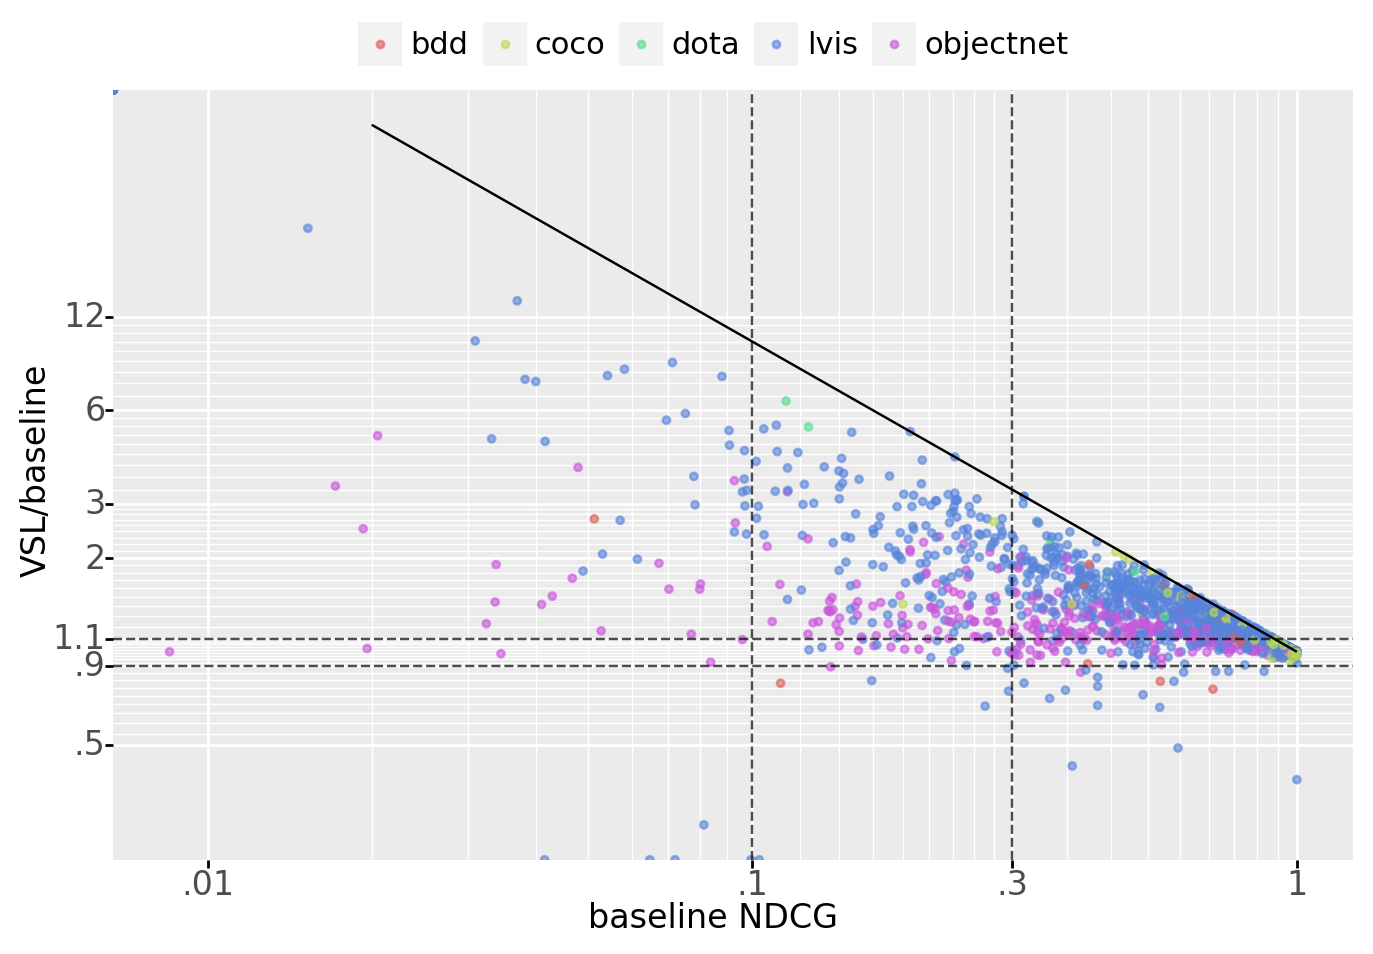

<ggplot: (8736941471196)>

In [66]:
variant='multiplain_warm_vec_only'
print_tables(stats,variant=variant)

In [100]:
stats100_objnet_lrsmall,_ = process_tups(results_on1, at_N=100)

  0%|          | 0/939 [00:00<?, ?it/s]

by dataset


multiplain  multiplain_warm_vec_fast    plain  num_queries
dataset                                                              
objectnet    0.407704                  0.399288  0.40766          313

by query


better  same  worse  total
dataset                              
objectnet      62   156     95    313
total          62   156     95    313

\begin{tabular}{lrrrr}
\toprule
{} &  better &  same &  worse &  total \\
dataset   &         &       &        &        \\
\midrule
objectnet &      62 &   156 &     95 &    313 \\
total     &      62 &   156 &     95 &    313 \\
\bottomrule
\end{tabular}

breakdown by initial res
total_counts:  313.0


part        .1   .3  1.
variant                
counts      23   87 203
baseline   .05  .20 .54
this work  .07  .22 .51
ratio     1.31 1.08 .96

\begin{tabular}{lrrr}
\toprule
part &   .1 &   .3 &  1. \\
variant   &      &      &     \\
\midrule
counts    &   23 &   87 & 203 \\
baseline  &  .05 &  .20 & .54 \\
this work &  .07 &  .22 & .51 \\
ratio     & 1.31 & 1.08 & .96 \\
\bottomrule
\end{tabular}

ablation


part                 .1  .1 delta  .3  .3 delta  1.  1. delta
variant                                                      
semantic embeddding .05       NaN .20       NaN .54       NaN
+ multiscale search .05       .00 .20       .00 .54     -0.00
+ feedback fusion   .07       .02 .22       .02 .51     -0.02

\begin{tabular}{lrrrrrr}
\toprule
part &  .1 &  .1 delta &  .3 &  .3 delta &  1. &  1. delta \\
variant             &     &           &     &           &     &           \\
\midrule
semantic embeddding & .05 &       NaN & .20 &       NaN & .54 &       NaN \\
+ multiscale search & .05 &       .00 & .20 &       .00 & .54 &     -0.00 \\
+ feedback fusion   & .07 &       .02 & .22 &       .02 & .51 &     -0.02 \\
\bottomrule
\end{tabular}



part                       .1  .1 delta        .3  .3 delta        1.  \
variant                                                                 
semantic embeddding  0.051806       NaN  0.203579       NaN  0.535442   
+ multiscale search  0.051848  0.000041  0.203809  0.000230  0.535406   
+ feedback fusion    0.067767  0.015919  0.219688  0.015879  0.513821   

part                 1. delta  
variant                        
semantic embeddding       NaN  
+ multiscale search -0.000036  
+ feedback fusion   -0.021585

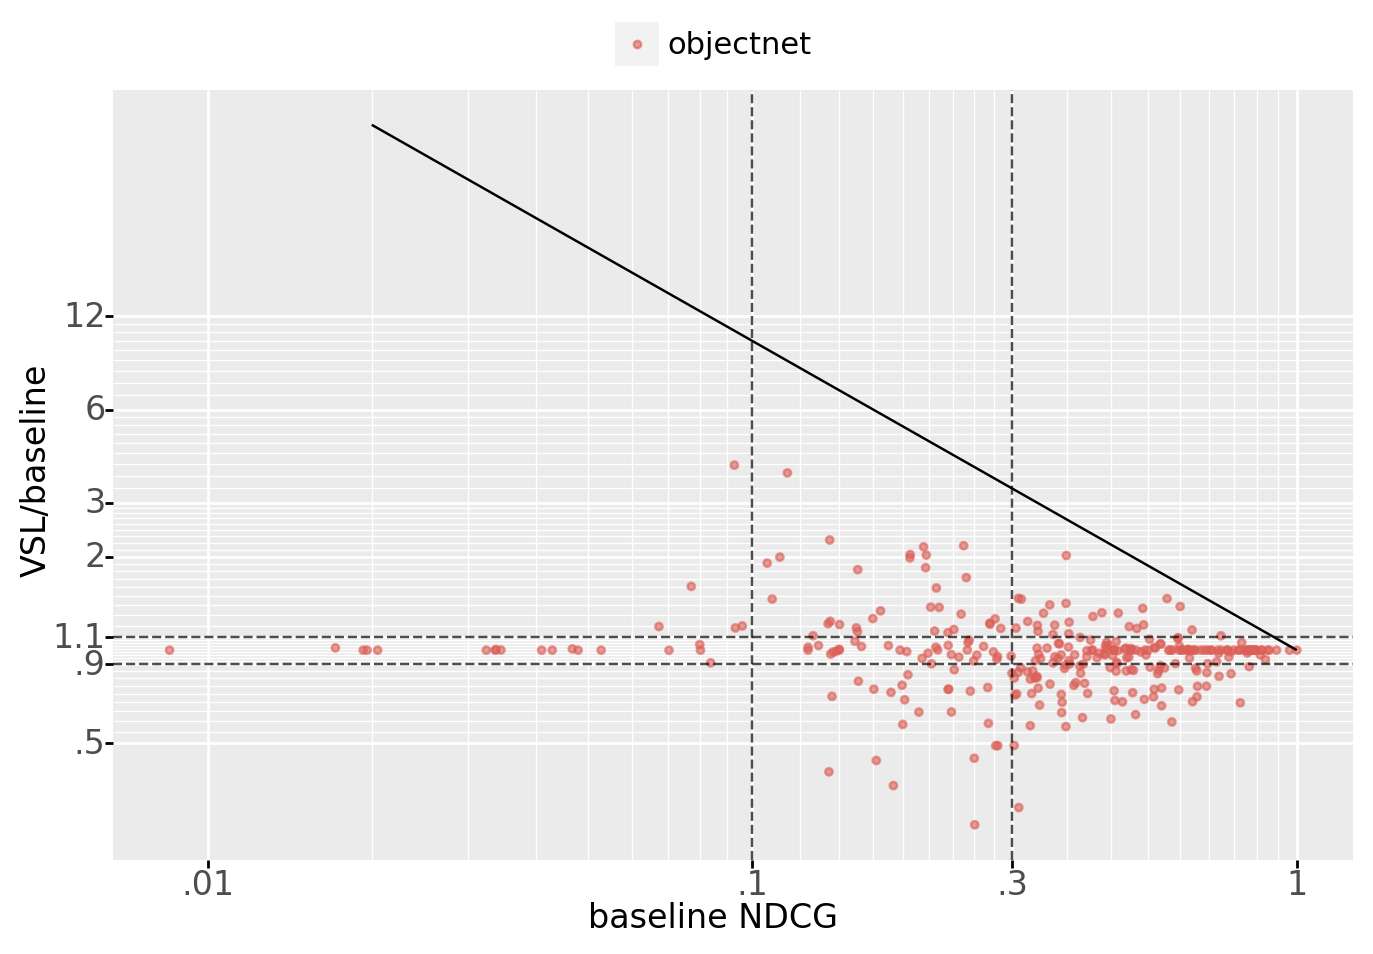

<ggplot: (8776775036603)>

In [101]:
print_tables(stats100_objnet_lrsmall, variant='multiplain_warm_vec_fast')

In [80]:
stats100_feedback10,_ = process_tups(new_results, at_N=100)

  0%|          | 0/4917 [00:00<?, ?it/s]

by dataset


multiplain  multiplain_warm_vec_fast     plain  num_queries
dataset                                                               
bdd          0.721451                  0.803383  0.722601           29
coco         0.915720                  0.934494  0.861299           80
dota         0.730835                  0.822013  0.609752           15
lvis         0.710103                  0.762265  0.618615         1202
objectnet    0.407704                  0.398443  0.407660          313

by query


better  same  worse  total
dataset                              
bdd            14    11      4     29
coco           23    55      2     80
dota           10     4      1     15
lvis          737   418     47   1202
objectnet      63   150    100    313
total         847   638    154   1639

\begin{tabular}{lrrrr}
\toprule
{} &  better &  same &  worse &  total \\
dataset   &         &       &        &        \\
\midrule
bdd       &      14 &    11 &      4 &     29 \\
coco      &      23 &    55 &      2 &     80 \\
dota      &      10 &     4 &      1 &     15 \\
lvis      &     737 &   418 &     47 &   1202 \\
objectnet &      63 &   150 &    100 &    313 \\
total     &     847 &   638 &    154 &   1639 \\
\bottomrule
\end{tabular}

breakdown by initial res
total_counts:  1639.0


part        .1   .3   1.
variant                 
counts      86  250 1303
baseline   .05  .18  .72
this work  .10  .41  .80
ratio     2.13 2.32 1.11

\begin{tabular}{lrrr}
\toprule
part &   .1 &   .3 &   1. \\
variant   &      &      &      \\
\midrule
counts    &   86 &  250 & 1303 \\
baseline  &  .05 &  .18 &  .72 \\
this work &  .10 &  .41 &  .80 \\
ratio     & 2.13 & 2.32 & 1.11 \\
\bottomrule
\end{tabular}

ablation


part                 .1  .1 delta  .3  .3 delta  1.  1. delta
variant                                                      
semantic embeddding .05       NaN .18       NaN .72       NaN
+ multiscale search .08       .03 .34       .17 .76       .04
+ feedback fusion   .10       .02 .41       .06 .80       .04

\begin{tabular}{lrrrrrr}
\toprule
part &  .1 &  .1 delta &  .3 &  .3 delta &  1. &  1. delta \\
variant             &     &           &     &           &     &           \\
\midrule
semantic embeddding & .05 &       NaN & .18 &       NaN & .72 &       NaN \\
+ multiscale search & .08 &       .03 & .34 &       .17 & .76 &       .04 \\
+ feedback fusion   & .10 &       .02 & .41 &       .06 & .80 &       .04 \\
\bottomrule
\end{tabular}



part                       .1  .1 delta        .3  .3 delta        1.  \
variant                                                                 
semantic embeddding  0.046423       NaN  0.175388       NaN  0.717915   
+ multiscale search  0.078106  0.031682  0.342036  0.166647  0.758326   
+ feedback fusion    0.098766  0.020660  0.406693  0.064658  0.799599   

part                 1. delta  
variant                        
semantic embeddding       NaN  
+ multiscale search  0.040411  
+ feedback fusion    0.041273

/home/gridsan/omoll/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
/home/gridsan/omoll/.local/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 13 rows containing missing values.


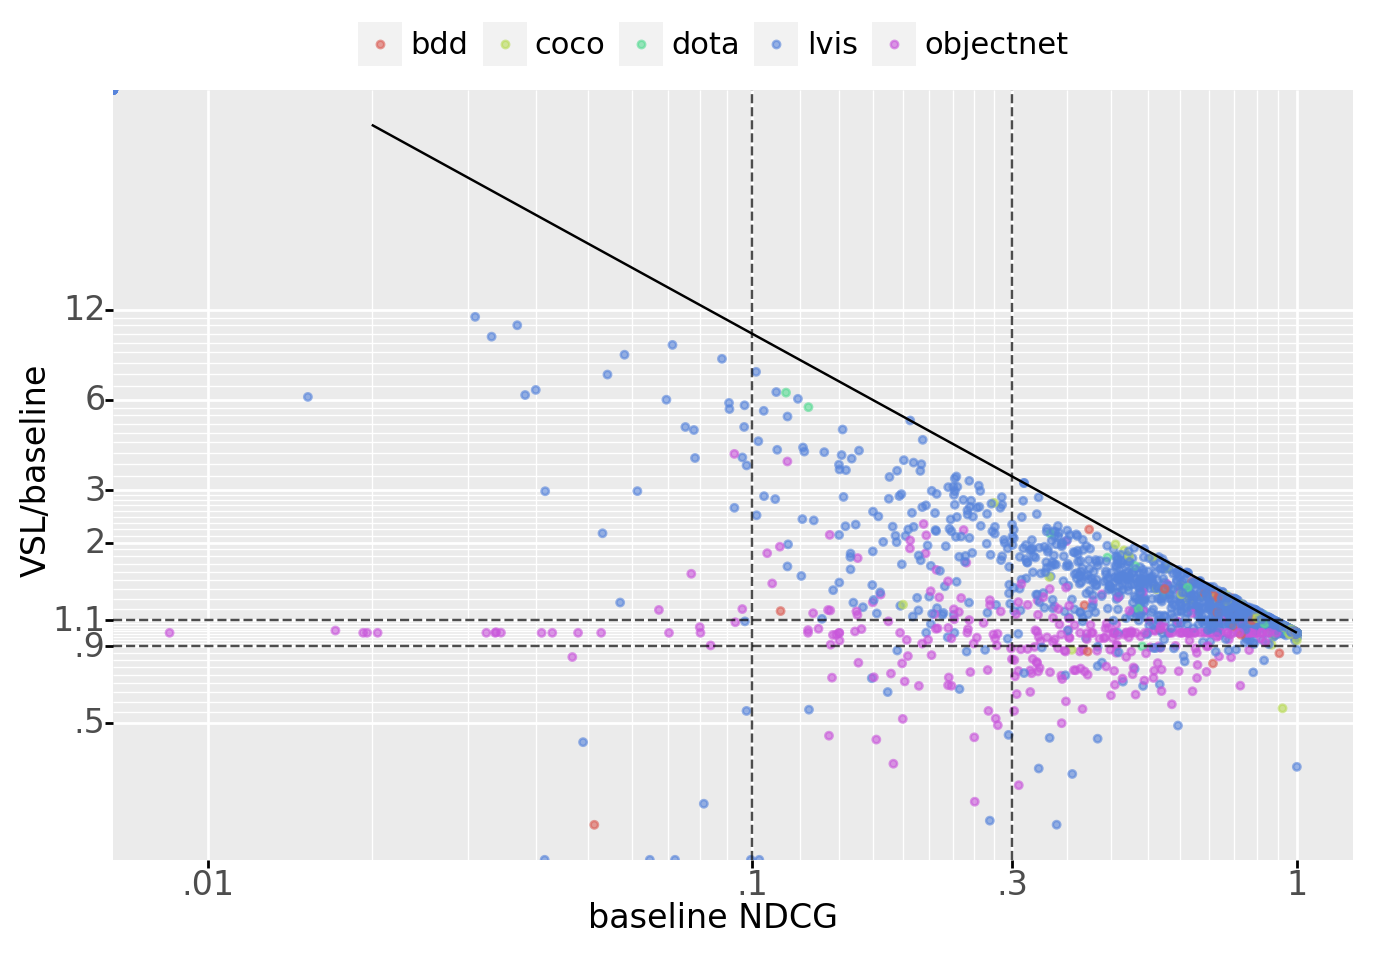

<ggplot: (8776778749877)>

In [81]:
print_tables(stats100_feedback10, variant='multiplain_warm_vec_fast')

In [104]:
#stats100_feedback10

ntotal  nfound  ndcg_score  ndatabase  abundance  nframes  nfirst  \
0       1       1    0.270238        209   0.004785      100    12.0   
1       1       1    0.315465        227   0.004405      100     8.0   
2       3       3    1.000000        429   0.006993      100     1.0   
3       2       2    0.877215        310   0.006452      100     1.0   
4       1       1    0.183169        223   0.004484      100    43.0   

   reciprocal_rank  at_N dataset variant               category  \
0         0.083333   100    lvis   plain                 cooker   
1         0.125000   100    lvis   plain              cockroach   
2         1.000000   100    lvis   plain                  grits   
3         1.000000   100    lvis   plain              houseboat   
4         0.023256   100    lvis   plain  clippers (for plants)   

                  qstr dataset_variant  run_id  
0               cooker            lvis       0  
1            cockroach            lvis       1  
2                grits            lvis       2  
3            houseboat            lvis       3  
4  clippers for plants            lvis       4

by dataset


multiplain  multiplain_warm_vec_fast     plain  num_queries
dataset                                                               
bdd          0.748749                  0.820606  0.753351           29
coco         0.939437                  0.957715  0.900086           80
dota         0.824192                  0.925029  0.710243           15
lvis         0.717486                  0.774859  0.616601         1202
objectnet    0.532905                  0.587038  0.532610          313

by query


better  same  worse  total
dataset                              
bdd            13    12      4     29
coco           20    58      2     80
dota           10     5      0     15
lvis          706   460     36   1202
objectnet     131   139     43    313
total         880   674     85   1639

\begin{tabular}{lrrrr}
\toprule
{} &  better &  same &  worse &  total \\
dataset   &         &       &        &        \\
\midrule
bdd       &      13 &    12 &      4 &     29 \\
coco      &      20 &    58 &      2 &     80 \\
dota      &      10 &     5 &      0 &     15 \\
lvis      &     706 &   460 &     36 &   1202 \\
objectnet &     131 &   139 &     43 &    313 \\
total     &     880 &   674 &     85 &   1639 \\
\bottomrule
\end{tabular}

breakdown by initial res
total_counts:  1639.0


part        .1  .3   1.
variant                
counts     132 218 1289
baseline   .03 .22  .78
this work  .20 .50  .87
ratio     6.24 2.3 1.11

\begin{tabular}{lrrr}
\toprule
part &   .1 &  .3 &   1. \\
variant   &      &     &      \\
\midrule
counts    &  132 & 218 & 1289 \\
baseline  &  .03 & .22 &  .78 \\
this work &  .20 & .50 &  .87 \\
ratio     & 6.24 & 2.3 & 1.11 \\
\bottomrule
\end{tabular}

ablation


part                 .1  .1 delta  .3  .3 delta  1.  1. delta
variant                                                      
semantic embeddding .03       NaN .22       NaN .78       NaN
+ multiscale search .09       .06 .42       .20 .82       .03
+ feedback fusion   .20       .10 .50       .09 .87       .05

\begin{tabular}{lrrrrrr}
\toprule
part &  .1 &  .1 delta &  .3 &  .3 delta &  1. &  1. delta \\
variant             &     &           &     &           &     &           \\
\midrule
semantic embeddding & .03 &       NaN & .22 &       NaN & .78 &       NaN \\
+ multiscale search & .09 &       .06 & .42 &       .20 & .82 &       .03 \\
+ feedback fusion   & .20 &       .10 & .50 &       .09 & .87 &       .05 \\
\bottomrule
\end{tabular}



part                       .1  .1 delta        .3  .3 delta        1.  \
variant                                                                 
semantic embeddding  0.031575       NaN  0.219541       NaN  0.783150   
+ multiscale search  0.092277  0.060702  0.415632  0.196090  0.817497   
+ feedback fusion    0.197008  0.104731  0.504803  0.089171  0.868054   

part                 1. delta  
variant                        
semantic embeddding       NaN  
+ multiscale search  0.034347  
+ feedback fusion    0.050557

/home/gridsan/omoll/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
/home/gridsan/omoll/.local/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 31 rows containing missing values.


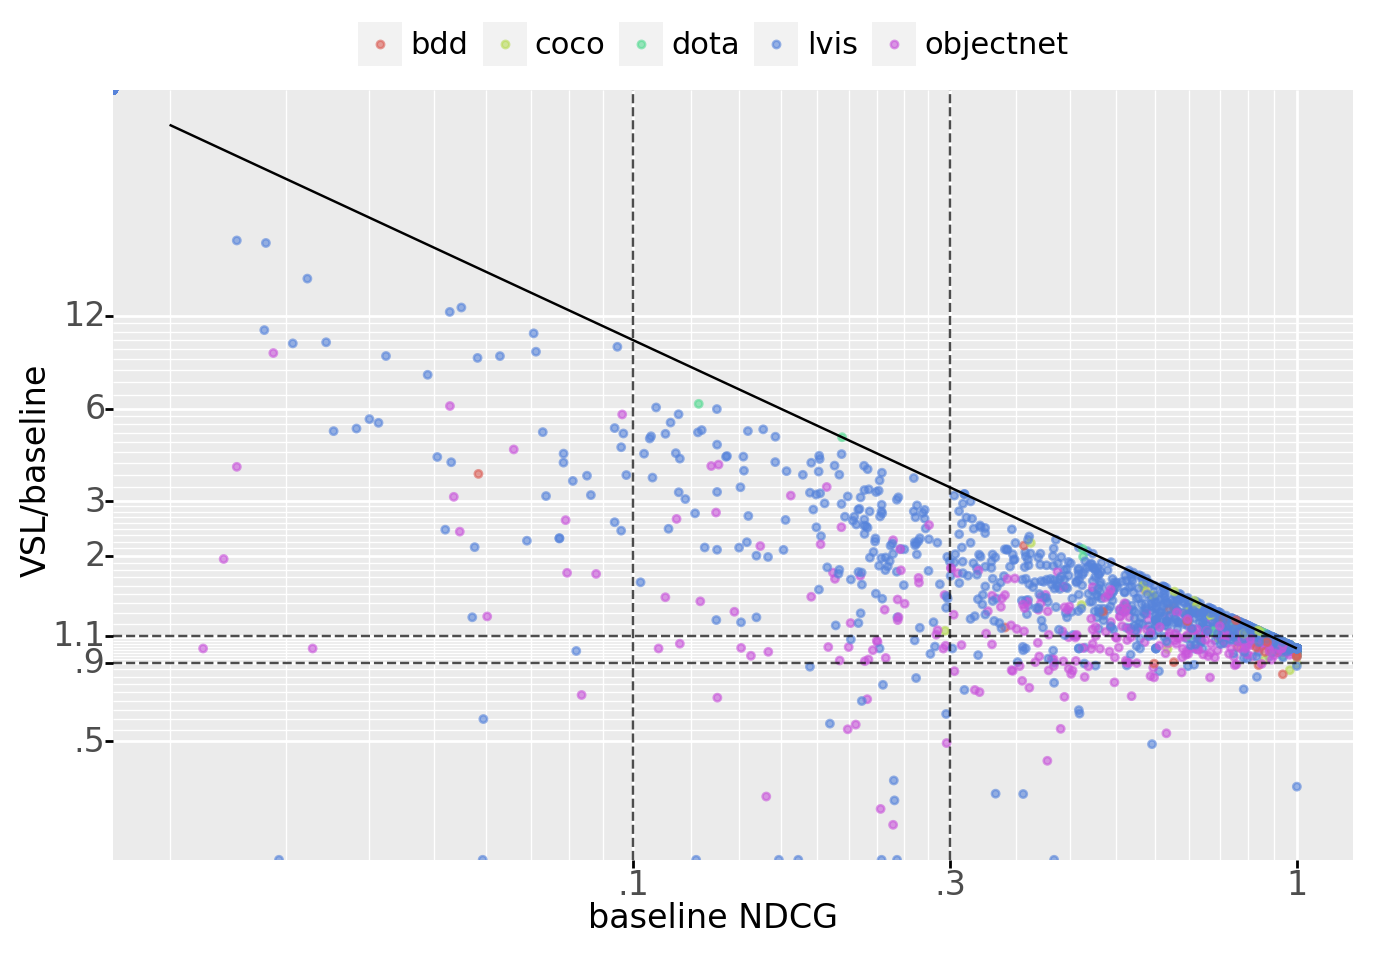

<ggplot: (8776776978719)>

In [61]:
print_tables(stats30, variant='multiplain_warm_vec_fast')

by dataset


multiplain  multiplain_warm_vec_fast     plain  num_queries
dataset                                                               
bdd          0.720637                  0.821003  0.722166           29
coco         0.914706                  0.956497  0.860259           80
dota         0.727555                  0.855507  0.607383           15
lvis         0.710137                  0.799115  0.619526         1202
objectnet    0.405384                  0.502266  0.405522          313

by query


better  same  worse  total
dataset                              
bdd            16    11      2     29
coco           23    57      0     80
dota           12     3      0     15
lvis          797   374     31   1202
objectnet     210    73     30    313
total        1058   518     63   1639

\begin{tabular}{lrrrr}
\toprule
{} &  better &  same &  worse &  total \\
dataset   &         &       &        &        \\
\midrule
bdd       &      16 &    11 &      2 &     29 \\
coco      &      23 &    57 &      0 &     80 \\
dota      &      12 &     3 &      0 &     15 \\
lvis      &     797 &   374 &     31 &   1202 \\
objectnet &     210 &    73 &     30 &    313 \\
total     &    1058 &   518 &     63 &   1639 \\
\bottomrule
\end{tabular}

breakdown by initial res
total_counts:  1639.0


part        .1   .3   1.
variant                 
counts      85  247 1307
baseline   .05  .17  .72
this work  .23  .45  .84
ratio     5.08 2.59 1.17

\begin{tabular}{lrrr}
\toprule
part &   .1 &   .3 &   1. \\
variant   &      &      &      \\
\midrule
counts    &   85 &  247 & 1307 \\
baseline  &  .05 &  .17 &  .72 \\
this work &  .23 &  .45 &  .84 \\
ratio     & 5.08 & 2.59 & 1.17 \\
\bottomrule
\end{tabular}

ablation


part                 .1  .1 delta  .3  .3 delta  1.  1. delta
variant                                                      
semantic embeddding .05       NaN .17       NaN .72       NaN
+ multiscale search .08       .03 .34       .17 .76       .04
+ feedback fusion   .23       .16 .45       .11 .84       .08

\begin{tabular}{lrrrrrr}
\toprule
part &  .1 &  .1 delta &  .3 &  .3 delta &  1. &  1. delta \\
variant             &     &           &     &           &     &           \\
\midrule
semantic embeddding & .05 &       NaN & .17 &       NaN & .72 &       NaN \\
+ multiscale search & .08 &       .03 & .34 &       .17 & .76 &       .04 \\
+ feedback fusion   & .23 &       .16 & .45 &       .11 & .84 &       .08 \\
\bottomrule
\end{tabular}



part                       .1  .1 delta        .3  .3 delta        1.  \
variant                                                                 
semantic embeddding  0.046127       NaN  0.174037       NaN  0.716454   
+ multiscale search  0.079144  0.033018  0.339713  0.165676  0.756527   
+ feedback fusion    0.234148  0.155004  0.451529  0.111816  0.841291   

part                 1. delta  
variant                        
semantic embeddding       NaN  
+ multiscale search  0.040073  
+ feedback fusion    0.084765

/home/gridsan/omoll/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
/home/gridsan/omoll/.local/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 13 rows containing missing values.


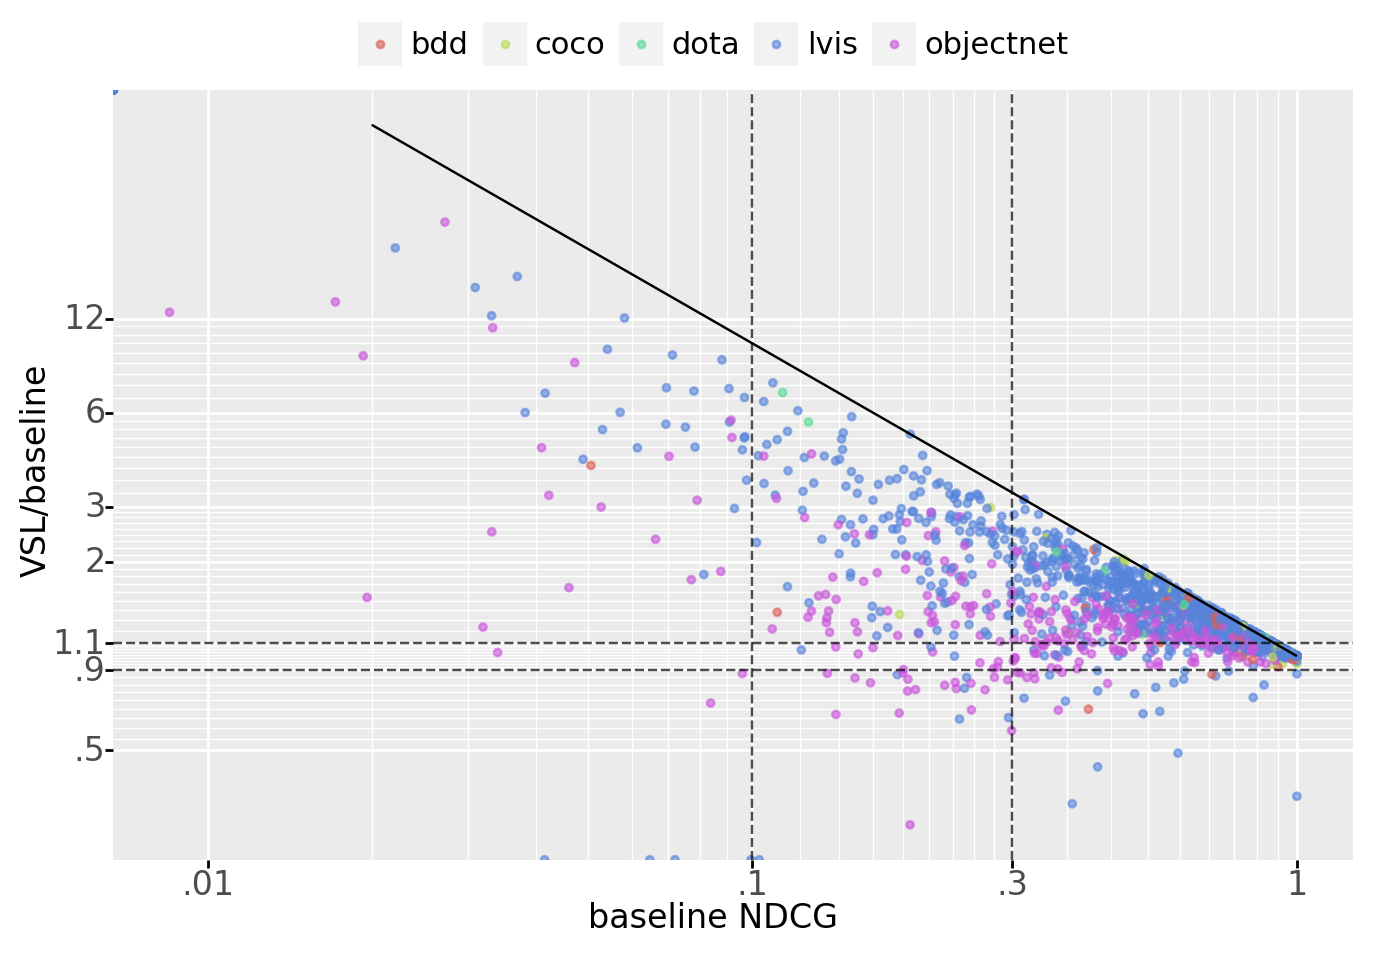

<ggplot: (8776779965076)>

In [56]:
print_tables(stats, variant='multiplain_warm_vec_fast')

by dataset


multiplain  multiplain_warm_vec_fast     plain  num_queries
dataset                                                               
bdd          0.729821                  0.817710  0.722601           29
coco         0.920811                  0.950333  0.861299           80
dota         0.744009                  0.849884  0.609752           15
lvis         0.709576                  0.782842  0.618615         1202
objectnet    0.407760                  0.497031  0.407660          313

by query


better  same  worse  total
dataset                              
bdd            12    14      3     29
coco           23    56      1     80
dota           11     4      0     15
lvis          795   382     25   1202
objectnet     206    86     21    313
total        1047   542     50   1639

\begin{tabular}{lrrrr}
\toprule
{} &  better &  same &  worse &  total \\
dataset   &         &       &        &        \\
\midrule
bdd       &      12 &    14 &      3 &     29 \\
coco      &      23 &    56 &      1 &     80 \\
dota      &      11 &     4 &      0 &     15 \\
lvis      &     795 &   382 &     25 &   1202 \\
objectnet &     206 &    86 &     21 &    313 \\
total     &    1047 &   542 &     50 &   1639 \\
\bottomrule
\end{tabular}

breakdown by initial res
total_counts:  1639.0


part        .1   .3   1.
variant                 
counts      86  250 1303
baseline   .05  .18  .72
this work  .24  .43  .83
ratio     5.17 2.46 1.16

\begin{tabular}{lrrr}
\toprule
part &   .1 &   .3 &   1. \\
variant   &      &      &      \\
\midrule
counts    &   86 &  250 & 1303 \\
baseline  &  .05 &  .18 &  .72 \\
this work &  .24 &  .43 &  .83 \\
ratio     & 5.17 & 2.46 & 1.16 \\
\bottomrule
\end{tabular}

ablation


part                 .1  .1 delta  .3  .3 delta  1.  1. delta
variant                                                      
semantic embeddding .05       NaN .18       NaN .72       NaN
+ multiscale search .08       .03 .35       .17 .76       .05
+ feedback fusion   .24       .16 .43       .08 .83       .07

\begin{tabular}{lrrrrrr}
\toprule
part &  .1 &  .1 delta &  .3 &  .3 delta &  1. &  1. delta \\
variant             &     &           &     &           &     &           \\
\midrule
semantic embeddding & .05 &       NaN & .18 &       NaN & .72 &       NaN \\
+ multiscale search & .08 &       .03 & .35 &       .17 & .76 &       .05 \\
+ feedback fusion   & .24 &       .16 & .43 &       .08 & .83 &       .07 \\
\bottomrule
\end{tabular}



part                       .1  .1 delta        .3  .3 delta        1.  \
variant                                                                 
semantic embeddding  0.046423       NaN  0.175388       NaN  0.717915   
+ multiscale search  0.081066  0.034642  0.346064  0.170676  0.763686   
+ feedback fusion    0.239996  0.158930  0.430678  0.084614  0.834828   

part                 1. delta  
variant                        
semantic embeddding       NaN  
+ multiscale search  0.045771  
+ feedback fusion    0.071142

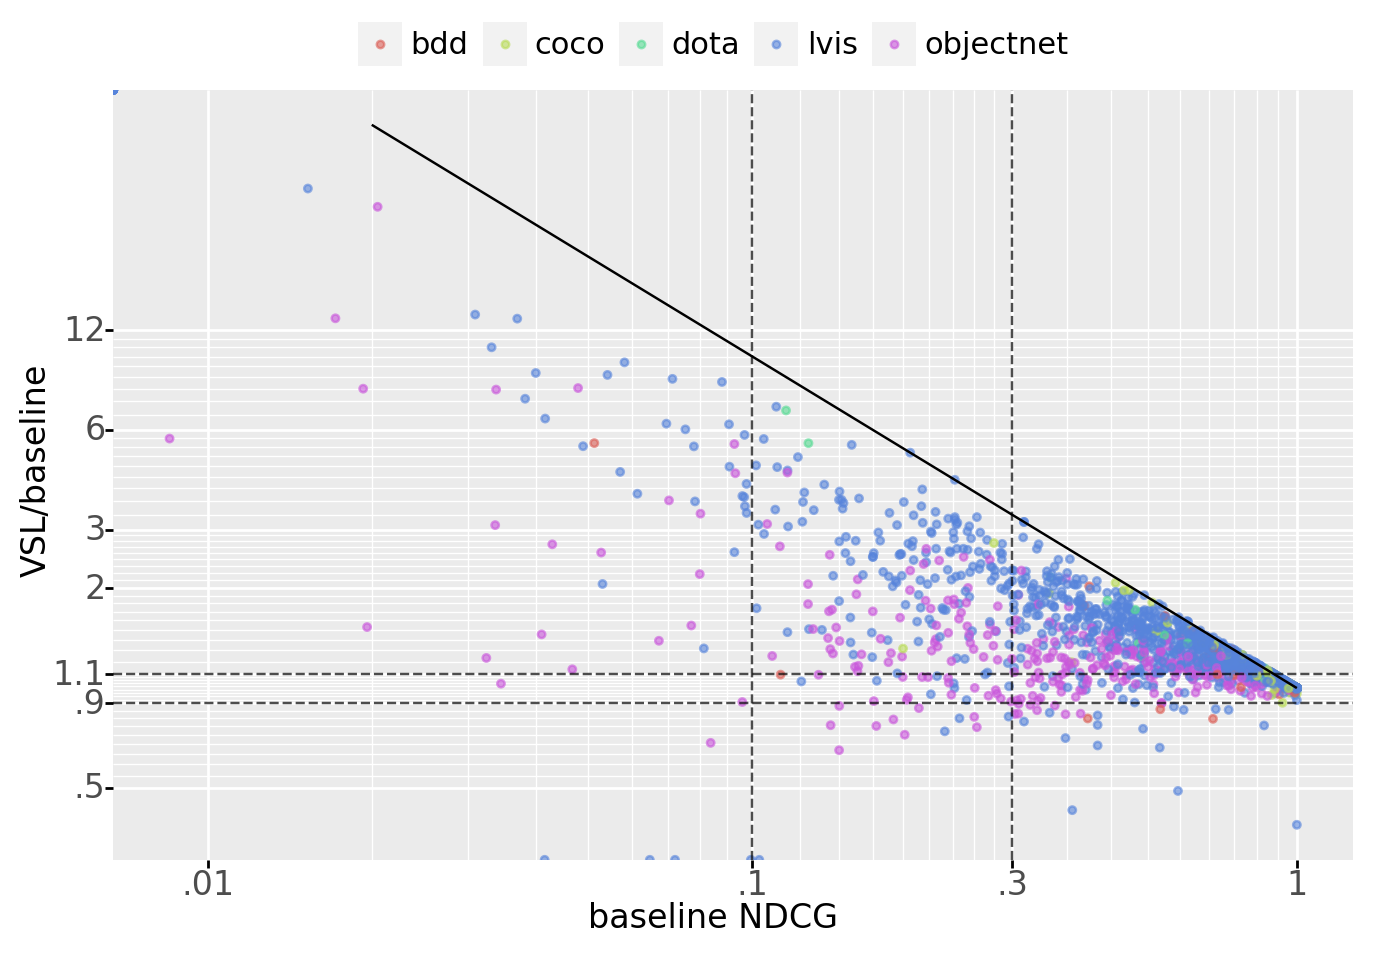

<ggplot: (8758098983021)>

In [199]:
print_tables(stats, variant='multiplain_warm_vec_fast')

by dataset


multiplain  multiplain_warm_vec_fast  multiplain_warm_vec_fast_new  \
dataset                                                                         
bdd          0.729813                  0.822550                      0.826815   
coco         0.920710                  0.950331                      0.953270   
dota         0.743803                  0.848598                      0.879872   
lvis         0.709576                  0.787186                      0.779060   
objectnet    0.407760                  0.497550                      0.496712   

           multiplain_warm_vec_only     plain  num_queries  
dataset                                                     
bdd                        0.795368  0.722601           29  
coco                       0.951207  0.861299           80  
dota                       0.842240  0.609752           15  
lvis                       0.766907  0.618615         1202  
objectnet                  0.473783  0.407660          313

by query


better  same  worse  total
dataset                              
bdd            15    11      3     29
coco           22    58      0     80
dota           11     4      0     15
lvis          765   407     30   1202
objectnet     210    84     19    313
total        1023   564     52   1639

\begin{tabular}{lrrrr}
\toprule
{} &  better &  same &  worse &  total \\
dataset   &         &       &        &        \\
\midrule
bdd       &      15 &    11 &      3 &     29 \\
coco      &      22 &    58 &      0 &     80 \\
dota      &      11 &     4 &      0 &     15 \\
lvis      &     765 &   407 &     30 &   1202 \\
objectnet &     210 &    84 &     19 &    313 \\
total     &    1023 &   564 &     52 &   1639 \\
\bottomrule
\end{tabular}

breakdown by initial res
total_counts:  1639.0


part        .1   .3   1.
variant                 
counts      86  250 1303
baseline   .05  .18  .72
this work  .24  .44  .84
ratio     5.13 2.49 1.17

\begin{tabular}{lrrr}
\toprule
part &   .1 &   .3 &   1. \\
variant   &      &      &      \\
\midrule
counts    &   86 &  250 & 1303 \\
baseline  &  .05 &  .18 &  .72 \\
this work &  .24 &  .44 &  .84 \\
ratio     & 5.13 & 2.49 & 1.17 \\
\bottomrule
\end{tabular}

ablation


part                 .1  .1 delta  .3  .3 delta  1.  1. delta
variant                                                      
semantic embeddding .05       NaN .18       NaN .72       NaN
+ multiscale search .08       .03 .35       .17 .76       .05
+ feedback fusion   .24       .16 .44       .09 .84       .08

\begin{tabular}{lrrrrrr}
\toprule
part &  .1 &  .1 delta &  .3 &  .3 delta &  1. &  1. delta \\
variant             &     &           &     &           &     &           \\
\midrule
semantic embeddding & .05 &       NaN & .18 &       NaN & .72 &       NaN \\
+ multiscale search & .08 &       .03 & .35 &       .17 & .76 &       .05 \\
+ feedback fusion   & .24 &       .16 & .44 &       .09 & .84 &       .08 \\
\bottomrule
\end{tabular}



part                       .1  .1 delta        .3  .3 delta        1.  \
variant                                                                 
semantic embeddding  0.046423       NaN  0.175388       NaN  0.717915   
+ multiscale search  0.081066  0.034642  0.346063  0.170675  0.763616   
+ feedback fusion    0.238081  0.157015  0.436127  0.090064  0.843130   

part                 1. delta  
variant                        
semantic embeddding       NaN  
+ multiscale search  0.045701  
+ feedback fusion    0.079514

/home/gridsan/omoll/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
/home/gridsan/omoll/.local/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 12 rows containing missing values.


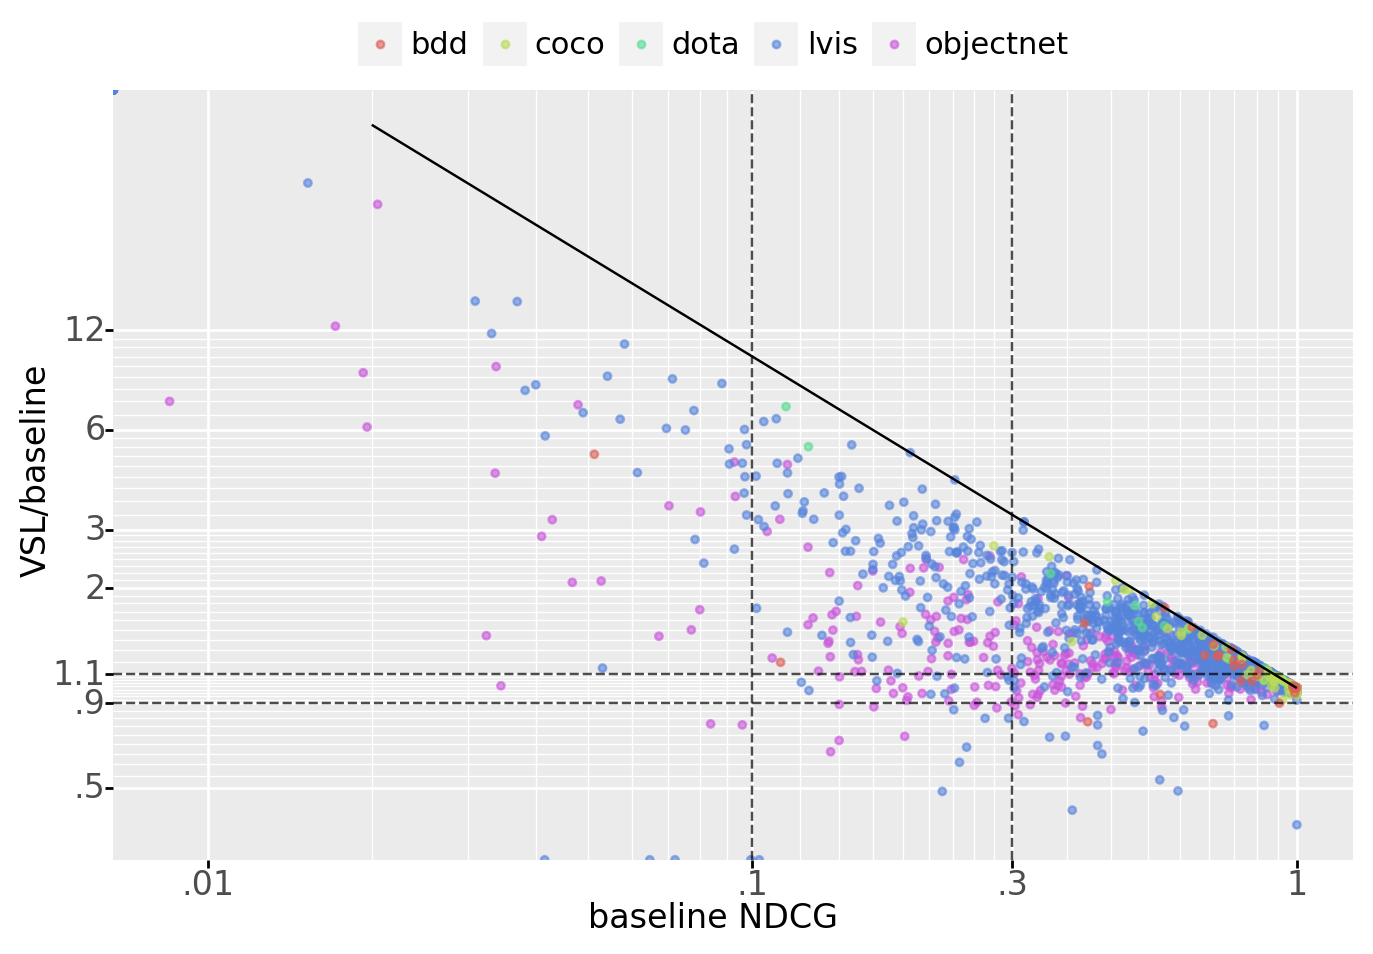

<ggplot: (8736542639541)>

In [101]:
print_tables(evs2, variant='multiplain_warm_vec_fast_new', resultlist=results, at_N=100)

In [ ]:
Out[101]

by dataset


multiplain  multiplain_warm_vec_fast  multiplain_warm_vec_only  \
dataset                                                                     
bdd          0.729813                  0.822550                  0.795368   
coco         0.920710                  0.950331                  0.951207   
dota         0.743803                  0.848598                  0.842240   
lvis         0.709576                  0.787186                  0.766907   
objectnet    0.407760                  0.497550                  0.473783   

              plain  num_queries  
dataset                           
bdd        0.722601           29  
coco       0.861299           80  
dota       0.609752           15  
lvis       0.618615         1202  
objectnet  0.407660          313

by query


better  same  worse  total
dataset                              
bdd            14    12      3     29
coco           23    56      1     80
dota           11     4      0     15
lvis          798   379     25   1202
objectnet     226    83      4    313
total        1072   534     33   1639

\begin{tabular}{lrrrr}
\toprule
{} &  better &  same &  worse &  total \\
dataset   &         &       &        &        \\
\midrule
bdd       &      14 &    12 &      3 &     29 \\
coco      &      23 &    56 &      1 &     80 \\
dota      &      11 &     4 &      0 &     15 \\
lvis      &     798 &   379 &     25 &   1202 \\
objectnet &     226 &    83 &      4 &    313 \\
total     &    1072 &   534 &     33 &   1639 \\
\bottomrule
\end{tabular}

breakdown by initial res
total_counts:  1639.0


part        .1   .3   1.
variant                 
counts      86  250 1303
baseline   .05  .18  .72
this work  .23  .43  .84
ratio     4.92 2.44 1.17

\begin{tabular}{lrrr}
\toprule
part &   .1 &   .3 &   1. \\
variant   &      &      &      \\
\midrule
counts    &   86 &  250 & 1303 \\
baseline  &  .05 &  .18 &  .72 \\
this work &  .23 &  .43 &  .84 \\
ratio     & 4.92 & 2.44 & 1.17 \\
\bottomrule
\end{tabular}

ablation


part                 .1  .1 delta  .3  .3 delta  1.  1. delta
variant                                                      
semantic embeddding .05       NaN .18       NaN .72       NaN
+ multiscale search .08       .03 .35       .17 .76       .05
+ feedback fusion   .23       .15 .43       .08 .84       .07

\begin{tabular}{lrrrrrr}
\toprule
part &  .1 &  .1 delta &  .3 &  .3 delta &  1. &  1. delta \\
variant             &     &           &     &           &     &           \\
\midrule
semantic embeddding & .05 &       NaN & .18 &       NaN & .72 &       NaN \\
+ multiscale search & .08 &       .03 & .35 &       .17 & .76 &       .05 \\
+ feedback fusion   & .23 &       .15 & .43 &       .08 & .84 &       .07 \\
\bottomrule
\end{tabular}



part                       .1  .1 delta        .3  .3 delta        1.  \
variant                                                                 
semantic embeddding  0.046423       NaN  0.175388       NaN  0.717915   
+ multiscale search  0.081066  0.034642  0.346063  0.170675  0.763616   
+ feedback fusion    0.228424  0.147359  0.428486  0.082422  0.837575   

part                 1. delta  
variant                        
semantic embeddding       NaN  
+ multiscale search  0.045701  
+ feedback fusion    0.073959

/home/gridsan/omoll/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
/home/gridsan/omoll/.local/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 12 rows containing missing values.


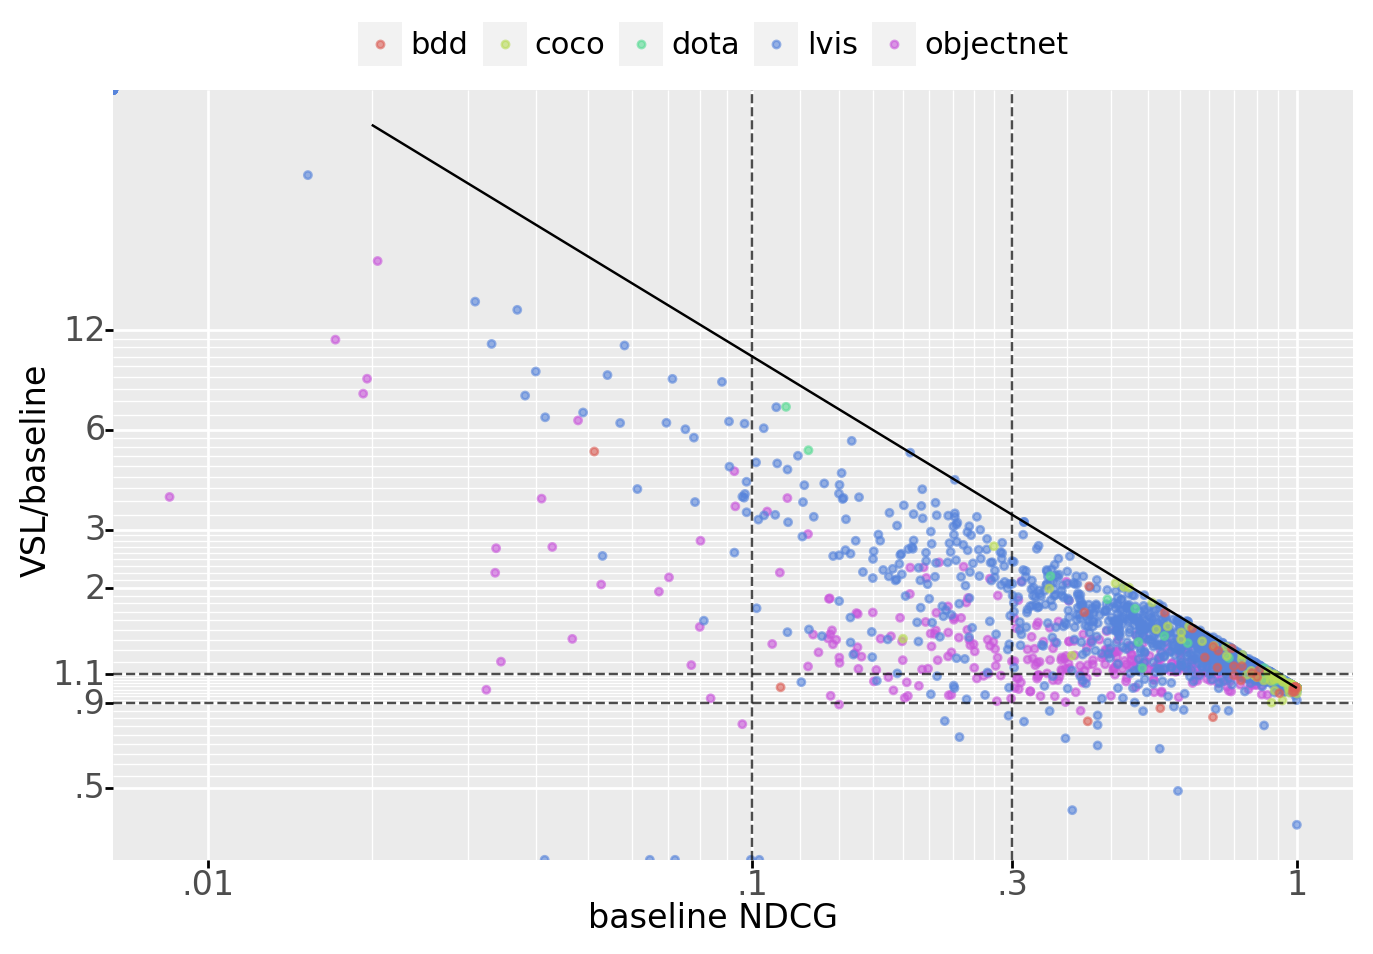

<ggplot: (8736544546747)>

In [78]:
print_tables(evs2, variant='multiplain_warm_vec_fast', resultlist=results, at_N=100)

by dataset


multiplain  multiplain_warm_vec_fast  multiplain_warm_vec_only  \
dataset                                                                     
bdd          0.749163                  0.815431                  0.772148   
coco         0.939736                  0.949559                  0.948410   
dota         0.842396                  0.893915                  0.875208   
lvis         0.711823                  0.757161                  0.732191   
objectnet    0.532907                  0.567092                  0.543957   

              plain  num_queries  
dataset                           
bdd        0.753351           29  
coco       0.900086           80  
dota       0.710243           15  
lvis       0.616601         1202  
objectnet  0.532610          313

by query


better  same  worse  total
dataset                              
bdd            11    15      3     29
coco           20    56      4     80
dota            7     8      0     15
lvis          702   469     31   1202
objectnet     108   200      5    313
total         848   748     43   1639

\begin{tabular}{lrrrr}
\toprule
{} &  better &  same &  worse &  total \\
dataset   &         &       &        &        \\
\midrule
bdd       &      11 &    15 &      3 &     29 \\
coco      &      20 &    56 &      4 &     80 \\
dota      &       7 &     8 &      0 &     15 \\
lvis      &     702 &   469 &     31 &   1202 \\
objectnet &     108 &   200 &      5 &    313 \\
total     &     848 &   748 &     43 &   1639 \\
\bottomrule
\end{tabular}

breakdown by initial res
total_counts:  1639.0


part        .1   .3   1.
variant                 
counts     132  218 1289
baseline   .03  .22  .78
this work  .16  .47  .86
ratio     5.15 2.15 1.09

\begin{tabular}{lrrr}
\toprule
part &   .1 &   .3 &   1. \\
variant   &      &      &      \\
\midrule
counts    &  132 &  218 & 1289 \\
baseline  &  .03 &  .22 &  .78 \\
this work &  .16 &  .47 &  .86 \\
ratio     & 5.15 & 2.15 & 1.09 \\
\bottomrule
\end{tabular}

ablation


part                 .1  .1 delta  .3  .3 delta  1.  1. delta
variant                                                      
semantic embeddding .03       NaN .22       NaN .78       NaN
+ multiscale search .09       .05 .43       .21 .82       .04
+ feedback fusion   .16       .08 .47       .04 .86       .04

\begin{tabular}{lrrrrrr}
\toprule
part &  .1 &  .1 delta &  .3 &  .3 delta &  1. &  1. delta \\
variant             &     &           &     &           &     &           \\
\midrule
semantic embeddding & .03 &       NaN & .22 &       NaN & .78 &       NaN \\
+ multiscale search & .09 &       .05 & .43 &       .21 & .82 &       .04 \\
+ feedback fusion   & .16 &       .08 & .47 &       .04 & .86 &       .04 \\
\bottomrule
\end{tabular}



part                       .1  .1 delta        .3  .3 delta       1.  1. delta
variant                                                                       
semantic embeddding  0.031575       NaN  0.219541       NaN  0.78315       NaN
+ multiscale search  0.085697  0.054122  0.427056  0.207514  0.81964   0.03649
+ feedback fusion    0.162513  0.076815  0.471125  0.044070  0.85609   0.03645

/home/gridsan/omoll/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
/home/gridsan/omoll/.local/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 32 rows containing missing values.


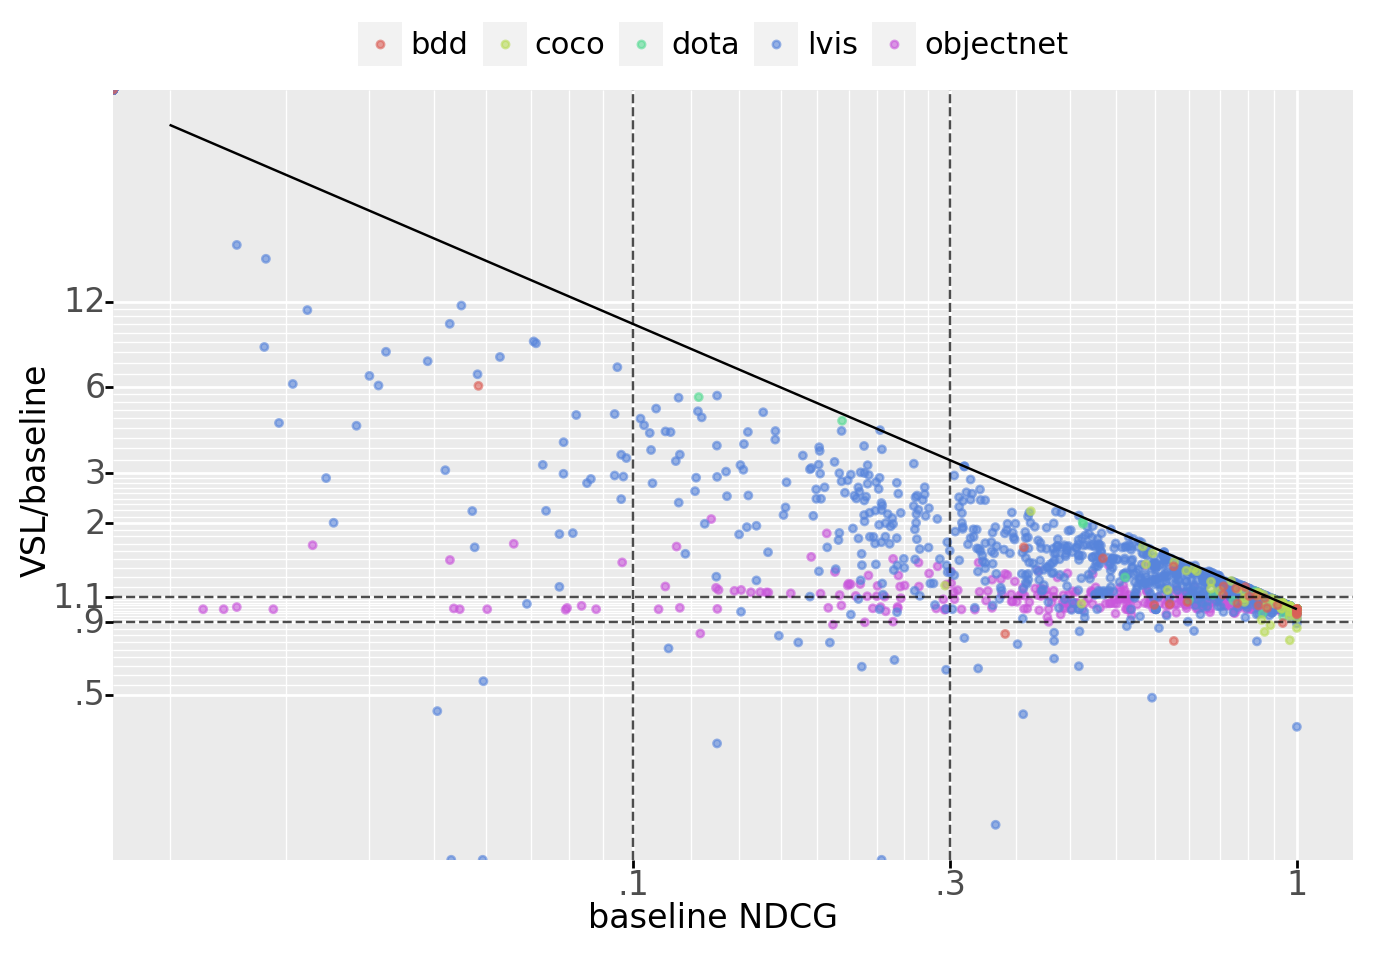

<ggplot: (8736544543169)>

In [77]:
print_tables(evs2, variant='multiplain_warm_vec_fast', resultlist=results, at_N=30)

In [90]:
stats = process_tups(evs=evs2, keys=evs.keys(), benchresults=benchresults, at_N=100)
all_vars = stats.groupby(['dataset', 'category', 'variant',]).ndcg_score.mean().unstack(-1)
means = all_vars.groupby('dataset').mean()
counts = all_vars.groupby('dataset').size()
pd.concat([means, counts],axis=1)

multiplain  multiplain_warm_vec_only     plain     0
dataset                                                        
bdd          0.724021                  0.796983  0.722364    29
coco         0.910035                  0.946209  0.861293    80
dota         0.753675                  0.855191  0.609754    15
lvis         0.709812                  0.767466  0.618817  1202
objectnet    0.404891                  0.472348  0.407764   313

In [62]:
stats = process_tups(evs=evs2, keys=evs.keys(), benchresults=benchresults, at_N=100)
all_vars = stats.groupby(['dataset', 'category', 'variant',]).ndcg_score.mean().unstack(-1)
means = all_vars.groupby('dataset').mean()
counts = all_vars.groupby('dataset').size()
pd.concat([means, counts],axis=1)

multiplain  multiplain_warm_vec_only     plain     0
dataset                                                        
bdd          0.724021                  0.796983  0.722364    29
coco         0.910035                  0.946209  0.861293    80
dota         0.753675                  0.855191  0.609754    15
lvis         0.709812                  0.767466  0.618817  1202
objectnet    0.404891                  0.472348  0.407764   313

In [43]:
stats = process_tups(evs=evs2, keys=evs.keys(), benchresults=benchresults, at_N=100)
all_vars = stats.groupby(['dataset', 'category', 'variant',]).ndcg_score.mean().unstack(-1)
means = all_vars.groupby('dataset').mean()
counts = all_vars.groupby('dataset').size()
pd.concat([means, counts],axis=1)

multiplain  multiplain_warm_vec_only     plain     0
dataset                                                        
bdd          0.724435                  0.793867  0.722601    29
coco         0.910082                  0.944175  0.861299    80
dota         0.753533                  0.852066  0.609752    15
lvis         0.709576                  0.763332  0.618615  1202
objectnet    0.404909                  0.472402  0.407660   313

In [32]:
bsw_table(stats, reltol=1.1)

better  same  worse  total
dataset                              
bdd            12    13      4     29
coco           25    54      1     80
dota           12     3      0     15
lvis          757   411     34   1202
objectnet     203   109      1    313
total        1009   590     40   1639

\begin{tabular}{lrrrr}
\toprule
{} &  better &  same &  worse &  total \\
dataset   &         &       &        &        \\
\midrule
bdd       &      12 &    13 &      4 &     29 \\
coco      &      25 &    54 &      1 &     80 \\
dota      &      12 &     3 &      0 &     15 \\
lvis      &     757 &   411 &     34 &   1202 \\
objectnet &     203 &   109 &      1 &    313 \\
total     &    1009 &   590 &     40 &   1639 \\
\bottomrule
\end{tabular}



In [65]:
bsw_table(stats, reltol=1.1)

better  same  worse  total
dataset                              
bdd            12    13      4     29
coco           25    55      0     80
dota           12     3      0     15
lvis          762   405     35   1202
objectnet     198   114      2    314
total        1009   590     41   1640

\begin{tabular}{lrrrr}
\toprule
{} &  better &  same &  worse &  total \\
dataset   &         &       &        &        \\
\midrule
bdd       &      12 &    13 &      4 &     29 \\
coco      &      25 &    55 &      0 &     80 \\
dota      &      12 &     3 &      0 &     15 \\
lvis      &     762 &   405 &     35 &   1202 \\
objectnet &     198 &   114 &      2 &    314 \\
total     &    1009 &   590 &     41 &   1640 \\
\bottomrule
\end{tabular}



In [48]:
bsw_table(stats, reltol=1.1)

better  same  worse  total
dataset                              
bdd            12    13      4     29
coco           25    55      0     80
dota           12     3      0     15
lvis          745   423     34   1202
objectnet     202   110      1    313
total         996   604     39   1639

\begin{tabular}{lrrrr}
\toprule
{} &  better &  same &  worse &  total \\
dataset   &         &       &        &        \\
\midrule
bdd       &      12 &    13 &      4 &     29 \\
coco      &      25 &    55 &      0 &     80 \\
dota      &      12 &     3 &      0 &     15 \\
lvis      &     745 &   423 &     34 &   1202 \\
objectnet &     202 &   110 &      1 &    313 \\
total     &     996 &   604 &     39 &   1639 \\
\bottomrule
\end{tabular}



In [108]:
bsw = bsw_table(stats)

better  same  worse
dataset                                      
bdd_10k_supercloud            15    11      3
coco_10k_supercloud           43    37      0
dota_10k_supercloud           10     5      0
lvis_10k_supercloud          314   558     79
objectnet_10k_supercloud     145   156     12
total                        527   767     94

\begin{tabular}{lrrr}
\toprule
{} &  better &  same &  worse \\
dataset                  &         &       &        \\
\midrule
bdd\_10k\_supercloud       &      15 &    11 &      3 \\
coco\_10k\_supercloud      &      43 &    37 &      0 \\
dota\_10k\_supercloud      &      10 &     5 &      0 \\
lvis\_10k\_supercloud      &     314 &   558 &     79 \\
objectnet\_10k\_supercloud &     145 &   156 &     12 \\
total                    &     527 &   767 &     94 \\
\bottomrule
\end{tabular}



In [49]:
from seesaw 

In [ ]:
sbs = better_same_worse(stats, variant='multiplain_warm_vec_only', summary=False)

In [82]:
tot_res = summary_breakdown(sbs)
#.groupby(['dataset', 'variant']).category.apply(lambda x : x.unique().shape[0]).unstack(level=-1)

In [74]:
comparison_table(tot_res)

total_counts:  1639.0


part        .1   .3   1.
variant                 
counts      86  250 1303
baseline   .05  .18  .72
this work  .10  .39  .83
ratio     2.11 2.22 1.15

\begin{tabular}{lrrr}
\toprule
part &   .1 &   .3 &   1. \\
variant   &      &      &      \\
\midrule
counts    &   86 &  250 & 1303 \\
baseline  &  .05 &  .18 &  .72 \\
this work &  .10 &  .39 &  .83 \\
ratio     & 2.11 & 2.22 & 1.15 \\
\bottomrule
\end{tabular}



part              .1          .3           1.
variant                                      
counts     86.000000  250.000000  1303.000000
baseline    0.046423    0.175388     0.717915
this work   0.098110    0.389813     0.827918
ratio       2.113379    2.222571     1.153226

In [79]:
ablation_table(tot_res)

part                 .1  .1 delta  .3  .3 delta  1.  1. delta
variant                                                      
semantic embeddding .05       NaN .18       NaN .72       NaN
+ multiscale search .07       .03 .33       .16 .76       .04
+ feedback fusion   .10       .02 .39       .06 .83       .07

\begin{tabular}{lrrrrrr}
\toprule
part &  .1 &  .1 delta &  .3 &  .3 delta &  1. &  1. delta \\
variant             &     &           &     &           &     &           \\
\midrule
semantic embeddding & .05 &       NaN & .18 &       NaN & .72 &       NaN \\
+ multiscale search & .07 &       .03 & .33 &       .16 & .76 &       .04 \\
+ feedback fusion   & .10 &       .02 & .39 &       .06 & .83 &       .07 \\
\bottomrule
\end{tabular}



part                       .1  .1 delta        .3  .3 delta        1.  \
variant                                                                 
semantic embeddding  0.046423       NaN  0.175388       NaN  0.717915   
+ multiscale search  0.074560  0.028137  0.332714  0.157326  0.762769   
+ feedback fusion    0.098110  0.023550  0.389813  0.057099  0.827918   

part                 1. delta  
variant                        
semantic embeddding       NaN  
+ multiscale search  0.044854  
+ feedback fusion    0.065149

In [84]:
ablation_table(tot_res)

0.1  0.1 delta  0.3  0.3 delta  1.0  1.0 delta
variant                                                            
semantic embeddding  .06        NaN  .22        NaN  .68        NaN
+ multiscale search  .15        .09  .33        .11  .72        .05
+ feedback fusion    .23        .08  .40        .06  .76        .04

\begin{tabular}{lrrrrrr}
\toprule
{} &  0.1 &  0.1 delta &  0.3 &  0.3 delta &  1.0 &  1.0 delta \\
variant             &      &            &      &            &      &            \\
\midrule
semantic embeddding &  .06 &        NaN &  .22 &        NaN &  .68 &        NaN \\
+ multiscale search &  .15 &        .09 &  .33 &        .11 &  .72 &        .05 \\
+ feedback fusion   &  .23 &        .08 &  .40 &        .06 &  .76 &        .04 \\
\bottomrule
\end{tabular}



0.1  0.1 delta       0.3  0.3 delta       1.0  \
variant                                                                   
semantic embeddding  0.059105        NaN  0.223374        NaN  0.677310   
+ multiscale search  0.147890   0.088785  0.334245   0.110871  0.722461   
+ feedback fusion    0.229589   0.081698  0.397158   0.062913  0.762536   

                     1.0 delta  
variant                         
semantic embeddding        NaN  
+ multiscale search   0.045151  
+ feedback fusion     0.040075

In [83]:
plotdata = sbs[sbs.variant == 'multiplain_warm_vec_only']

In [68]:
make_labeler.__module__

'seesaw.vls_benchmark_tools'

/home/gridsan/omoll/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
/home/gridsan/omoll/.local/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 12 rows containing missing values.


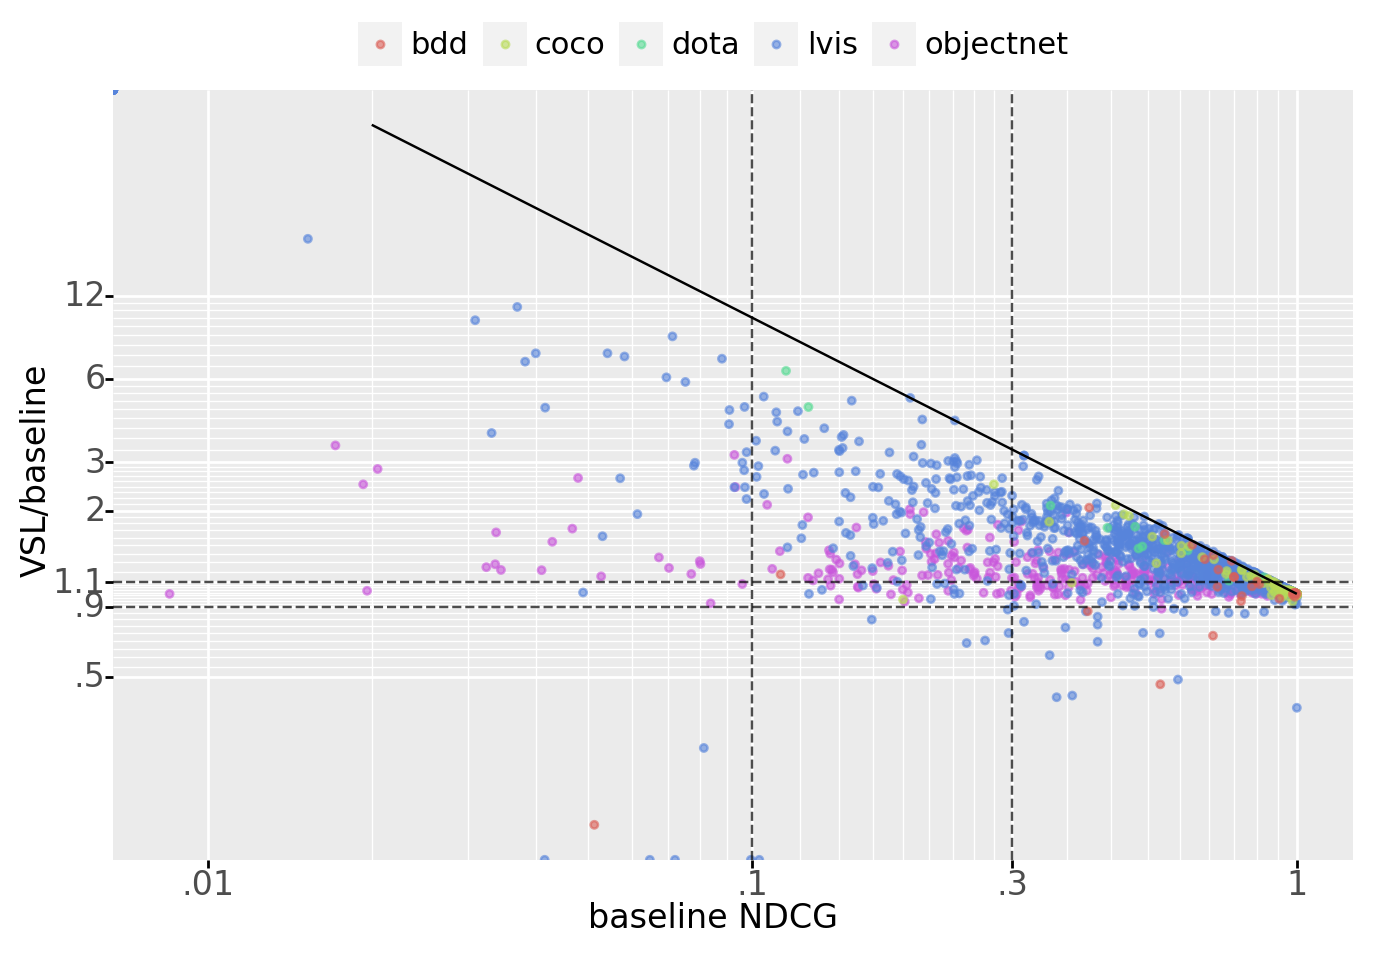

<ggplot: (8770274595410)>

In [84]:
ablation_table(tot_res)

x = np.geomspace(.02, 1, num=5)
y = 1/x
diag_df = pd.DataFrame({'x':x, 'y':y})

scatterplot = (ggplot(plotdata)
    + geom_point(aes(x='base', y='ratio', fill='dataset', color='dataset'), alpha=.6, size=1.) 
#                 shape=plotdata.dataset.map(lambda x : '.' if x in ['lvis','objectnet'] else 'o'), 
#                 size=plotdata.dataset.map(lambda x : 1. if x in ['lvis','objectnet'] else 2.))
#  + geom_text(aes(x='base', y='delta', label='category', color='dataset'), va='bottom', 
#              data=plotdata1[plotdata1.ratio < .6], 
#              position=position_jitter(.05, .05), show_legend=False)
    + geom_line(aes(x='x', y='y'), data=diag_df)
 + ylab('VSL/baseline')
#               + geom_area(aes(y2=1.1, y=.9), linetype='dashed', alpha=.7)
               + geom_hline(aes(yintercept=1.1), linetype='dashed', alpha=.7)
               + geom_hline(aes(yintercept=.9), linetype='dashed', alpha=.7)


                + geom_vline(aes(xintercept=.1,), linetype='dashed', alpha=.7)
                + geom_vline(aes(xintercept=.3,), linetype='dashed', alpha=.7)
#+ geom_abline()
#    + geom_point(aes(x='recall', y='precision', color='variant'), size=1.)
#     + facet_wrap(facets=['cat'], ncol=6, scales='free_x')
 + xlab('baseline NDCG')
# +scale_color_discrete()
    + theme(figure_size=(8,5), legend_position='top',
           subplots_adjust={'hspace': 0.5}, legend_title=element_blank(),
            legend_box_margin=-1, legend_margin=0.,
            axis_text=element_text(size=12, margin={'t':.2, 'l':-.3}),
            legend_text=element_text(size=11),
            axis_title=element_text(size=12, margin={'r':-.2, 'b':0., 'l':0, 't':0.}),
           )
    + scale_x_log10(labels=make_labeler(brief_format), breaks=[.01, .1, .3, 1.])
    + scale_y_log10(labels=make_labeler(brief_format), breaks=[.5, 0.9, 1.1, 2., 3.,6, 12])
)

scatterplot

In [87]:
scatterplot.save('/home/gridsan/omoll/seesaw.scatterfull.png')

/home/gridsan/omoll/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 8 x 5 in image.
/home/gridsan/omoll/.local/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /home/gridsan/omoll/seesaw.scatterfull.png
/home/gridsan/omoll/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
/home/gridsan/omoll/.local/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 12 rows containing missing values.


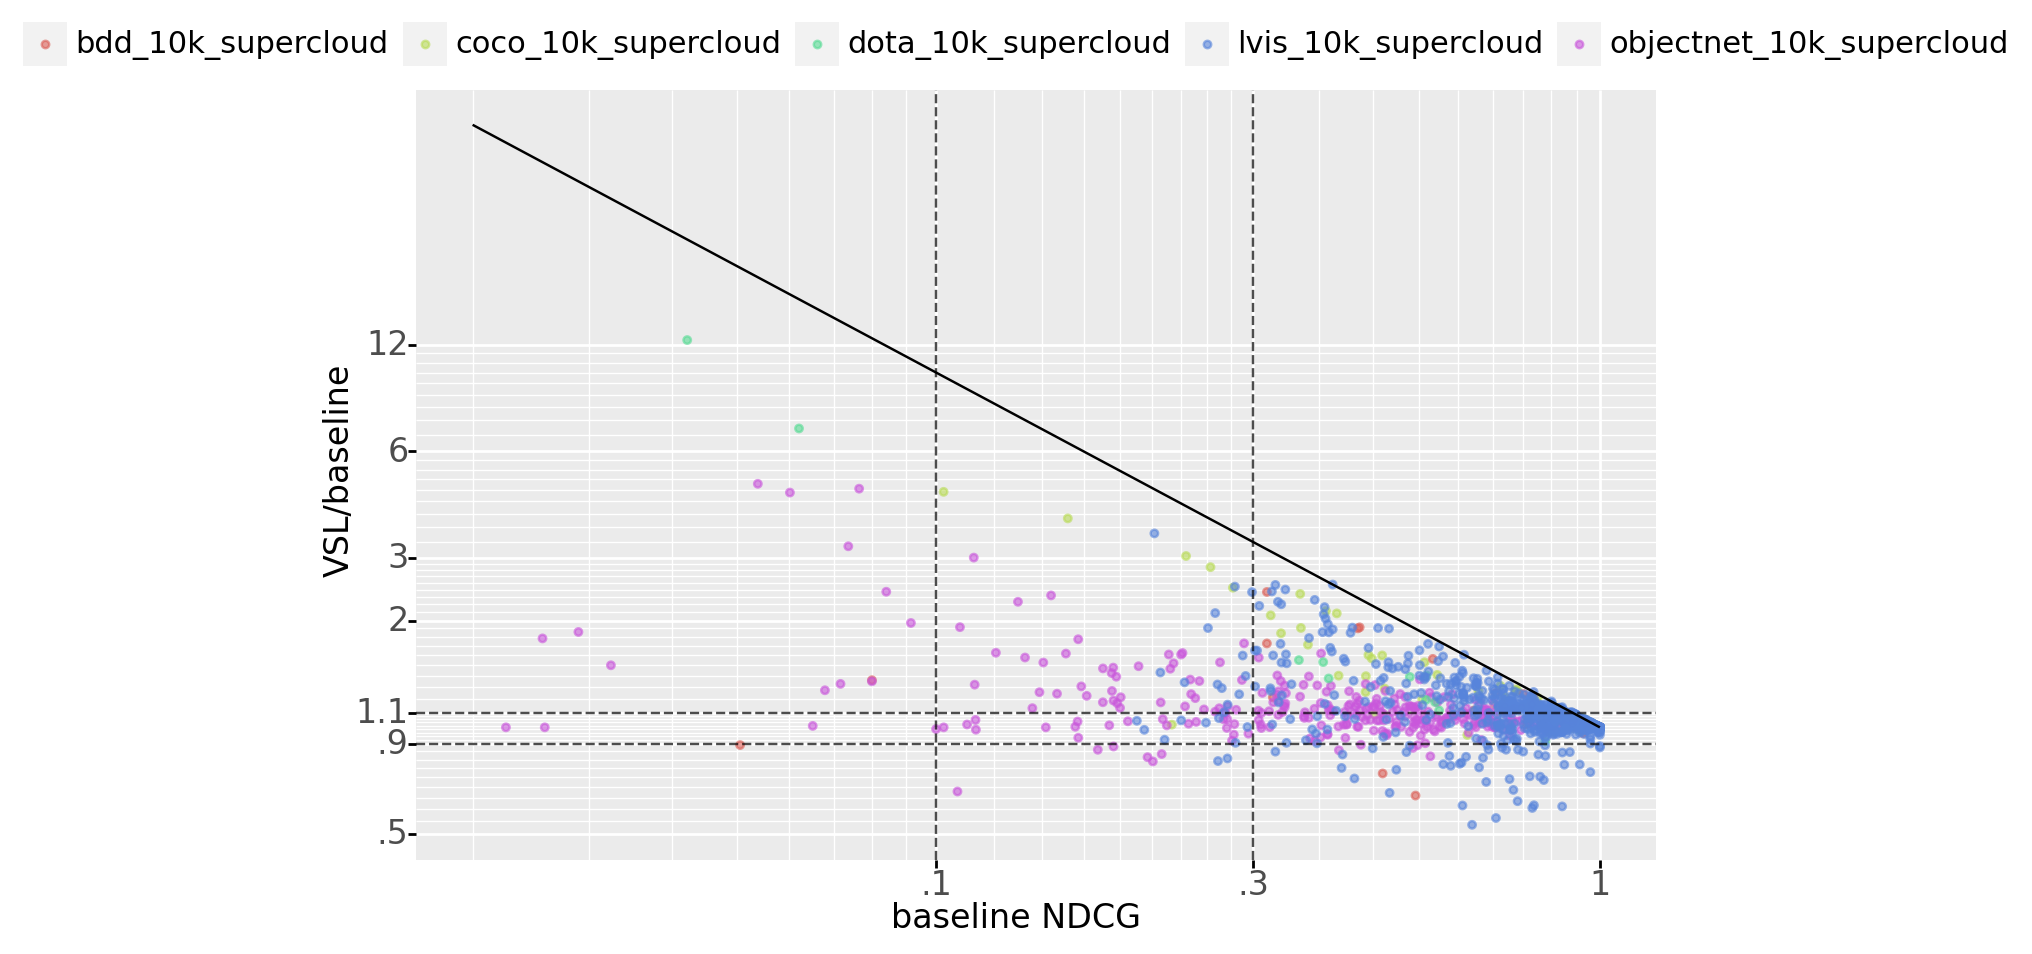

<ggplot: (8772441836517)>

In [91]:
x = np.geomspace(.02, 1, num=5)
y = 1/x
diag_df = pd.DataFrame({'x':x, 'y':y})

scatterplot = (ggplot(plotdata)
    + geom_point(aes(x='base', y='ratio', fill='dataset', color='dataset'), alpha=.6, size=1.) 
#                 shape=plotdata.dataset.map(lambda x : '.' if x in ['lvis','objectnet'] else 'o'), 
#                 size=plotdata.dataset.map(lambda x : 1. if x in ['lvis','objectnet'] else 2.))
#  + geom_text(aes(x='base', y='delta', label='category', color='dataset'), va='bottom', 
#              data=plotdata1[plotdata1.ratio < .6], 
#              position=position_jitter(.05, .05), show_legend=False)
    + geom_line(aes(x='x', y='y'), data=diag_df)
 + ylab('VSL/baseline')
#               + geom_area(aes(y2=1.1, y=.9), linetype='dashed', alpha=.7)
               + geom_hline(aes(yintercept=1.1), linetype='dashed', alpha=.7)
               + geom_hline(aes(yintercept=.9), linetype='dashed', alpha=.7)


                + geom_vline(aes(xintercept=.1,), linetype='dashed', alpha=.7)
                + geom_vline(aes(xintercept=.3,), linetype='dashed', alpha=.7)
#+ geom_abline()
#    + geom_point(aes(x='recall', y='precision', color='variant'), size=1.)
#     + facet_wrap(facets=['cat'], ncol=6, scales='free_x')
 + xlab('baseline NDCG')
# +scale_color_discrete()
    + theme(figure_size=(8,5), legend_position='top',
           subplots_adjust={'hspace': 0.5}, legend_title=element_blank(),
            legend_box_margin=-1, legend_margin=0.,
            axis_text=element_text(size=12, margin={'t':.2, 'l':-.3}),
            legend_text=element_text(size=11),
            axis_title=element_text(size=12, margin={'r':-.2, 'b':0., 'l':0, 't':0.}),
           )
    + scale_x_log10(labels=make_labeler(brief_format), breaks=[.01, .1, .3, 1.])
    + scale_y_log10(labels=make_labeler(brief_format), breaks=[.5, 0.9, 1.1, 2., 3.,6, 12])
)

scatterplot

In [259]:
cats = plotdata[plotdata.dataset == 'lvis'].sort_values('nfirst_y', ascending=False)[['category', 'nfirst_x', 'nfirst_y']].reset_index(drop=True)

In [260]:
cats.to_parquet('./data/cats_lvis_ordered.parquet')

In [265]:
sbs[(sbs.nfirst_x <= 5) & (sbs.nfirst_y > 20) & (sbs.variant == 'multiplain_warm_vec_only')]

dataset          category                   variant  ntotal  abundance  \
368     dota        helicopter  multiplain_warm_vec_only      23   0.023000   
394     lvis      bow (weapon)  multiplain_warm_vec_only       8   0.007175   
464     lvis      checkerboard  multiplain_warm_vec_only       4   0.005988   
524     lvis             drill  multiplain_warm_vec_only      21   0.020751   
1133    lvis          cornmeal  multiplain_warm_vec_only       1   0.004878   
1136    lvis            hammer  multiplain_warm_vec_only      33   0.032227   
1355    lvis        mint candy  multiplain_warm_vec_only      12   0.011858   
1487    lvis              cape  multiplain_warm_vec_only      26   0.023111   
1706    lvis            hornet  multiplain_warm_vec_only       1   0.004902   
1964    lvis   hot-air balloon  multiplain_warm_vec_only       3   0.005386   
2561    lvis        sugar bowl  multiplain_warm_vec_only      13   0.011404   
2672    lvis        piggy bank  multiplain_warm_vec_only       5   0.006112   
2741    lvis             banjo  multiplain_warm_vec_only       3   0.003480   
2849    lvis           handsaw  multiplain_warm_vec_only       8   0.007767   
3095    lvis           armband  multiplain_warm_vec_only      52   0.047663   
3800    lvis           thimble  multiplain_warm_vec_only       4   0.003831   
3884    lvis  bulletproof vest  multiplain_warm_vec_only       6   0.005797   
3968    lvis           playpen  multiplain_warm_vec_only       4   0.006547   

      nfirst_x  ndcg_score  nfound_x  nfirst_y  base_ndcg_score  nfound_y  \
368        2.0    0.539886        18      30.0         0.069854         3   
394        3.0    0.337481         4      26.0         0.134289         3   
464        5.0    0.341658         4      36.0         0.137418         2   
524        2.0    0.454678        15      22.0         0.075560         3   
1133       5.0    0.386853         1      32.0         0.198240         1   
1136       3.0    0.417670        18      25.0         0.091993         5   
1355       1.0    0.556627        10      29.0         0.071541         2   
1487       1.0    0.705236        21      21.0         0.179671         8   
1706       1.0    1.000000         1       inf         0.000000         0   
1964       1.0    0.716014         3      34.0         0.091490         1   
2561       5.0    0.487469        12      78.0         0.029622         1   
2672       2.0    0.426460         4      86.0         0.052641         1   
2741       5.0    0.411638         3      31.0         0.169670         2   
2849       5.0    0.355361         6      46.0         0.254301         6   
3095       4.0    0.630707        42      25.0         0.136328        10   
3800       5.0    0.457308         4      25.0         0.164257         2   
3884       2.0    0.547181         6      51.0         0.154062         3   
3968       4.0    0.341607         3      31.0         0.212665         3   

          base      ratio     delta  better  worse   same  
368   0.069854   7.728784  0.470032    True  False  False  
394   0.134289   2.513096  0.203192    True  False  False  
464   0.137418   2.486260  0.204239    True  False  False  
524   0.075560   6.017413  0.379117    True  False  False  
1133  0.198240   1.951438  0.188613    True  False  False  
1136  0.091993   4.540219  0.325677    True  False  False  
1355  0.071541   7.780547  0.485086    True  False  False  
1487  0.179671   3.925145  0.525565    True  False  False  
1706  0.000000        inf  1.000000    True  False  False  
1964  0.091490   7.826131  0.624524    True  False  False  
2561  0.029622  16.456569  0.457848    True  False  False  
2672  0.052641   8.101349  0.373819    True  False  False  
2741  0.169670   2.426108  0.241968    True  False  False  
2849  0.254301   1.397403  0.101060    True  False  False  
3095  0.136328   4.626381  0.494378    True  False  False  
3800  0.164257   2.784107  0.293051    True  False  False  
3884  0.154062   3.

In [267]:
# hot air balloon